In [1]:
import numpy as np
import matplotlib.pyplot as plt
from my_alg_lib import *
import math
import sys
import itertools

#https://medium.com/swlh/ray-tracing-from-scratch-in-python-41670e6a96f9

In [65]:
width = 900
height = 600

In [86]:
camera = np.array([0, 0, 1])
ratio = float(width) / height
screen = (-1, 1 / ratio, 1, -1 / ratio) # left, top, right, bottom

In [104]:
objects = [
    { 'center': np.array([-0.2, 0, -1]), 'radius': 0.7, 'ambient': np.array([0.1, 0, 0]), 'diffuse': np.array([0.7, 0, 0]), 'specular': np.array([1, 1, 1]), 'shininess': 100 },
    { 'center': np.array([0.1, -0.3, 0]), 'radius': 0.1, 'ambient': np.array([0.1, 0, 0.1]), 'diffuse': np.array([0.7, 0, 0.7]), 'specular': np.array([1, 1, 1]), 'shininess': 100 },
    { 'center': np.array([-0.3, 0, 0]), 'radius': 0.15, 'ambient': np.array([0, 0.1, 0]), 'diffuse': np.array([0, 0.6, 0]), 'specular': np.array([1, 1, 1]), 'shininess': 100 }
]

In [2]:
light = { 'position': np.array([60, 120, 40]), 'ambient': np.array([1, 1, 1]), 'diffuse': np.array([1, 1, 1]), 'specular': np.array([1, 1, 1]) }

In [3]:
def normalize(vector):
    return vector / np.linalg.norm(vector)

In [4]:
def sphere_intersect(center, radius, ray_origin, ray_direction):
    b = 2 * np.dot(ray_direction, ray_origin - center)
    c = np.linalg.norm(ray_origin - center) ** 2 - radius ** 2
    delta = b ** 2 - 4 * c
    if delta > 0:
        t1 = (-b + np.sqrt(delta)) / 2
        t2 = (-b - np.sqrt(delta)) / 2
        if t1 > 0 and t2 > 0:
            return min(t1, t2)
    return None

In [5]:
def nearest_intersected_object(objects, ray_origin, ray_direction):
    distances = [sphere_intersect(obj['center'], obj['radius'], ray_origin, ray_direction) for obj in objects]
    nearest_object = None
    min_distance = np.inf
    for index, distance in enumerate(distances):
        if distance and distance < min_distance:
            min_distance = distance
            nearest_object = objects[index]
    return nearest_object, min_distance

In [105]:
image = np.zeros((height, width, 3))
for i, y in enumerate(np.linspace(screen[1], screen[3], height)):
    for j, x in enumerate(np.linspace(screen[0], screen[2], width)):
        pixel = np.array([x, y, 0]) # 0 por conta da posição da camera
        origin = camera
        direction = normalize(pixel - origin)
        
        # check for intersections
        nearest_object, min_distance = nearest_intersected_object(objects, origin, direction)
        if nearest_object is None:
            continue

        # compute intersection point between ray and nearest object
        intersection = origin + min_distance * direction
        
        normal_to_surface = normalize(intersection - nearest_object['center'])
        shifted_point = intersection + 1e-5 * normal_to_surface
        intersection_to_light = normalize(light['position'] - shifted_point)

        _, min_distance = nearest_intersected_object(objects, shifted_point, intersection_to_light)
        intersection_to_light_distance = np.linalg.norm(light['position'] - intersection)
        is_shadowed = min_distance < intersection_to_light_distance

        if is_shadowed:
            continue
            
        # RGB
        illumination = np.zeros((3))

        # ambiant
        illumination += nearest_object['ambient'] * light['ambient']

        # diffuse
        illumination += nearest_object['diffuse'] * light['diffuse'] * np.dot(intersection_to_light, normal_to_surface)

        # specular
        intersection_to_camera = normalize(camera - intersection)
        H = normalize(intersection_to_light + intersection_to_camera)
        illumination += nearest_object['specular'] * light['specular'] * np.dot(normal_to_surface, H) ** (nearest_object['shininess'] / 4)

        image[i, j] = np.clip(illumination, 0, 1)
        
        # image[i, j] = ...
        print("progress: %d/%d" % (i + 1, height))

progress: 1/200
progress: 1/200
progress: 1/200
progress: 1/200
progress: 1/200
progress: 1/200
progress: 1/200
progress: 1/200
progress: 1/200
progress: 1/200
progress: 1/200
progress: 1/200
progress: 1/200
progress: 1/200
progress: 1/200
progress: 1/200
progress: 1/200
progress: 1/200
progress: 1/200
progress: 1/200
progress: 1/200
progress: 1/200
progress: 1/200
progress: 1/200
progress: 1/200
progress: 1/200
progress: 1/200
progress: 1/200
progress: 1/200
progress: 1/200
progress: 1/200
progress: 1/200
progress: 1/200
progress: 1/200
progress: 1/200
progress: 1/200
progress: 1/200
progress: 1/200
progress: 1/200
progress: 1/200
progress: 1/200
progress: 1/200
progress: 1/200
progress: 1/200
progress: 1/200
progress: 1/200
progress: 1/200
progress: 1/200
progress: 1/200
progress: 1/200
progress: 1/200
progress: 1/200
progress: 1/200
progress: 1/200
progress: 1/200
progress: 1/200
progress: 1/200
progress: 1/200
progress: 1/200
progress: 1/200
progress: 1/200
progress: 1/200
progress

progress: 4/200
progress: 4/200
progress: 4/200
progress: 4/200
progress: 4/200
progress: 4/200
progress: 4/200
progress: 4/200
progress: 4/200
progress: 4/200
progress: 4/200
progress: 4/200
progress: 4/200
progress: 4/200
progress: 4/200
progress: 4/200
progress: 4/200
progress: 4/200
progress: 4/200
progress: 4/200
progress: 4/200
progress: 4/200
progress: 4/200
progress: 4/200
progress: 4/200
progress: 4/200
progress: 4/200
progress: 4/200
progress: 4/200
progress: 4/200
progress: 4/200
progress: 4/200
progress: 4/200
progress: 4/200
progress: 4/200
progress: 4/200
progress: 4/200
progress: 4/200
progress: 4/200
progress: 4/200
progress: 4/200
progress: 4/200
progress: 4/200
progress: 4/200
progress: 4/200
progress: 4/200
progress: 4/200
progress: 4/200
progress: 4/200
progress: 5/200
progress: 5/200
progress: 5/200
progress: 5/200
progress: 5/200
progress: 5/200
progress: 5/200
progress: 5/200
progress: 5/200
progress: 5/200
progress: 5/200
progress: 5/200
progress: 5/200
progress

progress: 8/200
progress: 8/200
progress: 8/200
progress: 8/200
progress: 8/200
progress: 8/200
progress: 8/200
progress: 8/200
progress: 8/200
progress: 8/200
progress: 8/200
progress: 8/200
progress: 8/200
progress: 8/200
progress: 8/200
progress: 8/200
progress: 8/200
progress: 8/200
progress: 8/200
progress: 8/200
progress: 8/200
progress: 8/200
progress: 8/200
progress: 8/200
progress: 8/200
progress: 8/200
progress: 8/200
progress: 8/200
progress: 8/200
progress: 8/200
progress: 8/200
progress: 8/200
progress: 8/200
progress: 8/200
progress: 8/200
progress: 8/200
progress: 8/200
progress: 8/200
progress: 8/200
progress: 8/200
progress: 8/200
progress: 8/200
progress: 8/200
progress: 8/200
progress: 8/200
progress: 8/200
progress: 8/200
progress: 8/200
progress: 8/200
progress: 8/200
progress: 8/200
progress: 8/200
progress: 8/200
progress: 8/200
progress: 8/200
progress: 8/200
progress: 8/200
progress: 8/200
progress: 8/200
progress: 8/200
progress: 8/200
progress: 8/200
progress

progress: 12/200
progress: 12/200
progress: 12/200
progress: 12/200
progress: 12/200
progress: 12/200
progress: 12/200
progress: 12/200
progress: 12/200
progress: 12/200
progress: 12/200
progress: 12/200
progress: 12/200
progress: 12/200
progress: 12/200
progress: 12/200
progress: 12/200
progress: 12/200
progress: 12/200
progress: 12/200
progress: 12/200
progress: 12/200
progress: 12/200
progress: 12/200
progress: 12/200
progress: 12/200
progress: 12/200
progress: 12/200
progress: 12/200
progress: 12/200
progress: 12/200
progress: 12/200
progress: 12/200
progress: 12/200
progress: 12/200
progress: 12/200
progress: 12/200
progress: 12/200
progress: 12/200
progress: 12/200
progress: 12/200
progress: 12/200
progress: 12/200
progress: 12/200
progress: 12/200
progress: 12/200
progress: 12/200
progress: 12/200
progress: 12/200
progress: 12/200
progress: 12/200
progress: 12/200
progress: 12/200
progress: 12/200
progress: 12/200
progress: 12/200
progress: 12/200
progress: 12/200
progress: 12/2

progress: 15/200
progress: 15/200
progress: 15/200
progress: 15/200
progress: 15/200
progress: 15/200
progress: 15/200
progress: 15/200
progress: 15/200
progress: 15/200
progress: 15/200
progress: 15/200
progress: 15/200
progress: 15/200
progress: 15/200
progress: 15/200
progress: 15/200
progress: 15/200
progress: 15/200
progress: 15/200
progress: 15/200
progress: 15/200
progress: 15/200
progress: 15/200
progress: 15/200
progress: 15/200
progress: 15/200
progress: 15/200
progress: 15/200
progress: 15/200
progress: 15/200
progress: 15/200
progress: 15/200
progress: 15/200
progress: 15/200
progress: 15/200
progress: 15/200
progress: 15/200
progress: 15/200
progress: 15/200
progress: 15/200
progress: 15/200
progress: 15/200
progress: 15/200
progress: 15/200
progress: 15/200
progress: 15/200
progress: 15/200
progress: 15/200
progress: 15/200
progress: 16/200
progress: 16/200
progress: 16/200
progress: 16/200
progress: 16/200
progress: 16/200
progress: 16/200
progress: 16/200
progress: 16/2

progress: 17/200
progress: 17/200
progress: 17/200
progress: 17/200
progress: 17/200
progress: 17/200
progress: 17/200
progress: 17/200
progress: 17/200
progress: 17/200
progress: 17/200
progress: 17/200
progress: 17/200
progress: 17/200
progress: 17/200
progress: 17/200
progress: 17/200
progress: 17/200
progress: 17/200
progress: 17/200
progress: 17/200
progress: 17/200
progress: 17/200
progress: 17/200
progress: 17/200
progress: 17/200
progress: 17/200
progress: 17/200
progress: 17/200
progress: 17/200
progress: 17/200
progress: 17/200
progress: 17/200
progress: 17/200
progress: 17/200
progress: 17/200
progress: 17/200
progress: 17/200
progress: 17/200
progress: 17/200
progress: 17/200
progress: 17/200
progress: 17/200
progress: 17/200
progress: 17/200
progress: 17/200
progress: 17/200
progress: 17/200
progress: 17/200
progress: 17/200
progress: 17/200
progress: 17/200
progress: 17/200
progress: 17/200
progress: 17/200
progress: 17/200
progress: 17/200
progress: 17/200
progress: 17/2

progress: 19/200
progress: 19/200
progress: 19/200
progress: 19/200
progress: 19/200
progress: 19/200
progress: 19/200
progress: 19/200
progress: 19/200
progress: 19/200
progress: 19/200
progress: 19/200
progress: 19/200
progress: 19/200
progress: 19/200
progress: 19/200
progress: 19/200
progress: 19/200
progress: 19/200
progress: 19/200
progress: 19/200
progress: 19/200
progress: 19/200
progress: 19/200
progress: 19/200
progress: 19/200
progress: 19/200
progress: 19/200
progress: 19/200
progress: 19/200
progress: 19/200
progress: 19/200
progress: 19/200
progress: 19/200
progress: 19/200
progress: 19/200
progress: 19/200
progress: 19/200
progress: 19/200
progress: 19/200
progress: 19/200
progress: 19/200
progress: 19/200
progress: 19/200
progress: 19/200
progress: 19/200
progress: 19/200
progress: 19/200
progress: 19/200
progress: 19/200
progress: 19/200
progress: 19/200
progress: 19/200
progress: 19/200
progress: 19/200
progress: 19/200
progress: 19/200
progress: 19/200
progress: 19/2

progress: 21/200
progress: 21/200
progress: 21/200
progress: 21/200
progress: 21/200
progress: 21/200
progress: 21/200
progress: 21/200
progress: 21/200
progress: 21/200
progress: 21/200
progress: 21/200
progress: 21/200
progress: 21/200
progress: 21/200
progress: 21/200
progress: 21/200
progress: 21/200
progress: 21/200
progress: 21/200
progress: 21/200
progress: 21/200
progress: 21/200
progress: 21/200
progress: 21/200
progress: 21/200
progress: 21/200
progress: 21/200
progress: 21/200
progress: 21/200
progress: 21/200
progress: 21/200
progress: 21/200
progress: 21/200
progress: 21/200
progress: 21/200
progress: 21/200
progress: 21/200
progress: 21/200
progress: 21/200
progress: 21/200
progress: 21/200
progress: 21/200
progress: 21/200
progress: 21/200
progress: 21/200
progress: 21/200
progress: 21/200
progress: 21/200
progress: 21/200
progress: 21/200
progress: 21/200
progress: 21/200
progress: 21/200
progress: 21/200
progress: 21/200
progress: 21/200
progress: 21/200
progress: 21/2

progress: 23/200
progress: 23/200
progress: 23/200
progress: 23/200
progress: 23/200
progress: 23/200
progress: 23/200
progress: 23/200
progress: 23/200
progress: 23/200
progress: 23/200
progress: 23/200
progress: 23/200
progress: 23/200
progress: 23/200
progress: 23/200
progress: 23/200
progress: 23/200
progress: 23/200
progress: 23/200
progress: 23/200
progress: 23/200
progress: 23/200
progress: 23/200
progress: 23/200
progress: 23/200
progress: 23/200
progress: 23/200
progress: 23/200
progress: 23/200
progress: 23/200
progress: 23/200
progress: 23/200
progress: 23/200
progress: 23/200
progress: 23/200
progress: 23/200
progress: 23/200
progress: 23/200
progress: 23/200
progress: 23/200
progress: 23/200
progress: 23/200
progress: 23/200
progress: 23/200
progress: 23/200
progress: 23/200
progress: 23/200
progress: 23/200
progress: 23/200
progress: 23/200
progress: 23/200
progress: 23/200
progress: 23/200
progress: 23/200
progress: 23/200
progress: 23/200
progress: 23/200
progress: 23/2

progress: 26/200
progress: 26/200
progress: 26/200
progress: 26/200
progress: 26/200
progress: 26/200
progress: 26/200
progress: 26/200
progress: 27/200
progress: 27/200
progress: 27/200
progress: 27/200
progress: 27/200
progress: 27/200
progress: 27/200
progress: 27/200
progress: 27/200
progress: 27/200
progress: 27/200
progress: 27/200
progress: 27/200
progress: 27/200
progress: 27/200
progress: 27/200
progress: 27/200
progress: 27/200
progress: 27/200
progress: 27/200
progress: 27/200
progress: 27/200
progress: 27/200
progress: 27/200
progress: 27/200
progress: 27/200
progress: 27/200
progress: 27/200
progress: 27/200
progress: 27/200
progress: 27/200
progress: 27/200
progress: 27/200
progress: 27/200
progress: 27/200
progress: 27/200
progress: 27/200
progress: 27/200
progress: 27/200
progress: 27/200
progress: 27/200
progress: 27/200
progress: 27/200
progress: 27/200
progress: 27/200
progress: 27/200
progress: 27/200
progress: 27/200
progress: 27/200
progress: 27/200
progress: 27/2

progress: 28/200
progress: 28/200
progress: 28/200
progress: 28/200
progress: 28/200
progress: 28/200
progress: 28/200
progress: 28/200
progress: 28/200
progress: 28/200
progress: 28/200
progress: 28/200
progress: 28/200
progress: 28/200
progress: 28/200
progress: 28/200
progress: 28/200
progress: 28/200
progress: 28/200
progress: 28/200
progress: 28/200
progress: 28/200
progress: 28/200
progress: 28/200
progress: 28/200
progress: 28/200
progress: 28/200
progress: 28/200
progress: 28/200
progress: 28/200
progress: 28/200
progress: 28/200
progress: 28/200
progress: 28/200
progress: 28/200
progress: 28/200
progress: 28/200
progress: 28/200
progress: 28/200
progress: 28/200
progress: 28/200
progress: 28/200
progress: 28/200
progress: 29/200
progress: 29/200
progress: 29/200
progress: 29/200
progress: 29/200
progress: 29/200
progress: 29/200
progress: 29/200
progress: 29/200
progress: 29/200
progress: 29/200
progress: 29/200
progress: 29/200
progress: 29/200
progress: 29/200
progress: 29/2

progress: 30/200
progress: 30/200
progress: 30/200
progress: 30/200
progress: 30/200
progress: 30/200
progress: 30/200
progress: 30/200
progress: 30/200
progress: 30/200
progress: 30/200
progress: 30/200
progress: 30/200
progress: 30/200
progress: 30/200
progress: 30/200
progress: 30/200
progress: 30/200
progress: 30/200
progress: 30/200
progress: 30/200
progress: 30/200
progress: 30/200
progress: 30/200
progress: 30/200
progress: 30/200
progress: 30/200
progress: 30/200
progress: 30/200
progress: 30/200
progress: 30/200
progress: 30/200
progress: 30/200
progress: 30/200
progress: 30/200
progress: 30/200
progress: 30/200
progress: 30/200
progress: 30/200
progress: 30/200
progress: 30/200
progress: 30/200
progress: 30/200
progress: 30/200
progress: 30/200
progress: 30/200
progress: 30/200
progress: 30/200
progress: 30/200
progress: 30/200
progress: 30/200
progress: 30/200
progress: 30/200
progress: 30/200
progress: 30/200
progress: 30/200
progress: 30/200
progress: 30/200
progress: 30/2

progress: 32/200
progress: 32/200
progress: 32/200
progress: 32/200
progress: 32/200
progress: 32/200
progress: 32/200
progress: 32/200
progress: 32/200
progress: 32/200
progress: 32/200
progress: 32/200
progress: 32/200
progress: 32/200
progress: 32/200
progress: 32/200
progress: 32/200
progress: 32/200
progress: 32/200
progress: 32/200
progress: 32/200
progress: 32/200
progress: 32/200
progress: 32/200
progress: 32/200
progress: 32/200
progress: 32/200
progress: 32/200
progress: 32/200
progress: 32/200
progress: 32/200
progress: 32/200
progress: 32/200
progress: 32/200
progress: 32/200
progress: 32/200
progress: 32/200
progress: 32/200
progress: 32/200
progress: 32/200
progress: 32/200
progress: 32/200
progress: 32/200
progress: 32/200
progress: 32/200
progress: 32/200
progress: 32/200
progress: 32/200
progress: 32/200
progress: 32/200
progress: 32/200
progress: 32/200
progress: 32/200
progress: 32/200
progress: 32/200
progress: 32/200
progress: 32/200
progress: 32/200
progress: 32/2

progress: 34/200
progress: 34/200
progress: 34/200
progress: 34/200
progress: 34/200
progress: 34/200
progress: 34/200
progress: 34/200
progress: 34/200
progress: 34/200
progress: 34/200
progress: 34/200
progress: 34/200
progress: 34/200
progress: 34/200
progress: 34/200
progress: 34/200
progress: 34/200
progress: 34/200
progress: 34/200
progress: 34/200
progress: 34/200
progress: 34/200
progress: 34/200
progress: 34/200
progress: 34/200
progress: 34/200
progress: 34/200
progress: 34/200
progress: 34/200
progress: 34/200
progress: 34/200
progress: 34/200
progress: 34/200
progress: 34/200
progress: 34/200
progress: 34/200
progress: 34/200
progress: 34/200
progress: 34/200
progress: 34/200
progress: 34/200
progress: 34/200
progress: 34/200
progress: 34/200
progress: 34/200
progress: 34/200
progress: 34/200
progress: 34/200
progress: 34/200
progress: 34/200
progress: 34/200
progress: 34/200
progress: 34/200
progress: 34/200
progress: 34/200
progress: 34/200
progress: 34/200
progress: 34/2

progress: 35/200
progress: 35/200
progress: 35/200
progress: 35/200
progress: 35/200
progress: 35/200
progress: 35/200
progress: 35/200
progress: 35/200
progress: 35/200
progress: 35/200
progress: 35/200
progress: 35/200
progress: 35/200
progress: 35/200
progress: 35/200
progress: 35/200
progress: 35/200
progress: 35/200
progress: 35/200
progress: 35/200
progress: 35/200
progress: 35/200
progress: 35/200
progress: 35/200
progress: 35/200
progress: 35/200
progress: 35/200
progress: 35/200
progress: 35/200
progress: 35/200
progress: 35/200
progress: 35/200
progress: 35/200
progress: 35/200
progress: 35/200
progress: 35/200
progress: 35/200
progress: 35/200
progress: 35/200
progress: 35/200
progress: 35/200
progress: 35/200
progress: 35/200
progress: 35/200
progress: 35/200
progress: 35/200
progress: 35/200
progress: 35/200
progress: 35/200
progress: 35/200
progress: 35/200
progress: 35/200
progress: 35/200
progress: 35/200
progress: 35/200
progress: 35/200
progress: 36/200
progress: 36/2

progress: 37/200
progress: 37/200
progress: 37/200
progress: 37/200
progress: 37/200
progress: 37/200
progress: 37/200
progress: 37/200
progress: 37/200
progress: 37/200
progress: 37/200
progress: 37/200
progress: 37/200
progress: 37/200
progress: 37/200
progress: 37/200
progress: 37/200
progress: 37/200
progress: 37/200
progress: 37/200
progress: 37/200
progress: 37/200
progress: 37/200
progress: 37/200
progress: 37/200
progress: 37/200
progress: 37/200
progress: 37/200
progress: 37/200
progress: 37/200
progress: 37/200
progress: 37/200
progress: 37/200
progress: 37/200
progress: 37/200
progress: 37/200
progress: 37/200
progress: 37/200
progress: 37/200
progress: 37/200
progress: 37/200
progress: 37/200
progress: 37/200
progress: 37/200
progress: 37/200
progress: 37/200
progress: 37/200
progress: 37/200
progress: 37/200
progress: 37/200
progress: 37/200
progress: 37/200
progress: 37/200
progress: 37/200
progress: 37/200
progress: 37/200
progress: 37/200
progress: 37/200
progress: 37/2

progress: 39/200
progress: 39/200
progress: 39/200
progress: 39/200
progress: 39/200
progress: 39/200
progress: 39/200
progress: 39/200
progress: 39/200
progress: 39/200
progress: 39/200
progress: 39/200
progress: 39/200
progress: 39/200
progress: 39/200
progress: 39/200
progress: 39/200
progress: 39/200
progress: 39/200
progress: 39/200
progress: 39/200
progress: 39/200
progress: 39/200
progress: 39/200
progress: 39/200
progress: 39/200
progress: 39/200
progress: 39/200
progress: 39/200
progress: 39/200
progress: 39/200
progress: 39/200
progress: 39/200
progress: 39/200
progress: 39/200
progress: 39/200
progress: 39/200
progress: 39/200
progress: 39/200
progress: 39/200
progress: 39/200
progress: 39/200
progress: 39/200
progress: 39/200
progress: 39/200
progress: 39/200
progress: 39/200
progress: 39/200
progress: 39/200
progress: 39/200
progress: 39/200
progress: 39/200
progress: 39/200
progress: 39/200
progress: 39/200
progress: 39/200
progress: 39/200
progress: 39/200
progress: 39/2

progress: 41/200
progress: 41/200
progress: 41/200
progress: 41/200
progress: 41/200
progress: 41/200
progress: 41/200
progress: 41/200
progress: 41/200
progress: 41/200
progress: 41/200
progress: 41/200
progress: 41/200
progress: 41/200
progress: 41/200
progress: 41/200
progress: 41/200
progress: 41/200
progress: 41/200
progress: 41/200
progress: 41/200
progress: 41/200
progress: 41/200
progress: 41/200
progress: 41/200
progress: 41/200
progress: 41/200
progress: 41/200
progress: 41/200
progress: 41/200
progress: 41/200
progress: 41/200
progress: 41/200
progress: 41/200
progress: 41/200
progress: 41/200
progress: 41/200
progress: 41/200
progress: 41/200
progress: 41/200
progress: 41/200
progress: 41/200
progress: 41/200
progress: 41/200
progress: 41/200
progress: 41/200
progress: 41/200
progress: 41/200
progress: 41/200
progress: 41/200
progress: 41/200
progress: 41/200
progress: 41/200
progress: 41/200
progress: 41/200
progress: 41/200
progress: 41/200
progress: 41/200
progress: 41/2

progress: 42/200
progress: 42/200
progress: 42/200
progress: 42/200
progress: 42/200
progress: 42/200
progress: 42/200
progress: 42/200
progress: 42/200
progress: 42/200
progress: 42/200
progress: 42/200
progress: 42/200
progress: 42/200
progress: 42/200
progress: 42/200
progress: 42/200
progress: 42/200
progress: 42/200
progress: 42/200
progress: 42/200
progress: 42/200
progress: 42/200
progress: 42/200
progress: 42/200
progress: 42/200
progress: 42/200
progress: 42/200
progress: 42/200
progress: 42/200
progress: 42/200
progress: 42/200
progress: 42/200
progress: 42/200
progress: 42/200
progress: 42/200
progress: 42/200
progress: 42/200
progress: 42/200
progress: 42/200
progress: 42/200
progress: 42/200
progress: 42/200
progress: 42/200
progress: 42/200
progress: 42/200
progress: 42/200
progress: 42/200
progress: 42/200
progress: 42/200
progress: 42/200
progress: 42/200
progress: 42/200
progress: 42/200
progress: 42/200
progress: 42/200
progress: 42/200
progress: 42/200
progress: 42/2

progress: 44/200
progress: 44/200
progress: 44/200
progress: 44/200
progress: 44/200
progress: 44/200
progress: 44/200
progress: 44/200
progress: 44/200
progress: 44/200
progress: 44/200
progress: 44/200
progress: 44/200
progress: 44/200
progress: 44/200
progress: 44/200
progress: 44/200
progress: 44/200
progress: 44/200
progress: 44/200
progress: 44/200
progress: 44/200
progress: 44/200
progress: 44/200
progress: 44/200
progress: 44/200
progress: 44/200
progress: 44/200
progress: 44/200
progress: 44/200
progress: 44/200
progress: 44/200
progress: 44/200
progress: 44/200
progress: 44/200
progress: 44/200
progress: 44/200
progress: 44/200
progress: 44/200
progress: 44/200
progress: 44/200
progress: 44/200
progress: 44/200
progress: 44/200
progress: 44/200
progress: 44/200
progress: 44/200
progress: 44/200
progress: 44/200
progress: 44/200
progress: 44/200
progress: 44/200
progress: 44/200
progress: 44/200
progress: 44/200
progress: 44/200
progress: 44/200
progress: 44/200
progress: 44/2

progress: 47/200
progress: 47/200
progress: 47/200
progress: 47/200
progress: 47/200
progress: 47/200
progress: 47/200
progress: 47/200
progress: 47/200
progress: 47/200
progress: 47/200
progress: 47/200
progress: 47/200
progress: 47/200
progress: 47/200
progress: 47/200
progress: 47/200
progress: 47/200
progress: 47/200
progress: 47/200
progress: 47/200
progress: 47/200
progress: 47/200
progress: 47/200
progress: 47/200
progress: 47/200
progress: 47/200
progress: 47/200
progress: 47/200
progress: 47/200
progress: 47/200
progress: 47/200
progress: 47/200
progress: 47/200
progress: 47/200
progress: 47/200
progress: 47/200
progress: 47/200
progress: 47/200
progress: 47/200
progress: 47/200
progress: 47/200
progress: 47/200
progress: 47/200
progress: 47/200
progress: 47/200
progress: 47/200
progress: 47/200
progress: 47/200
progress: 47/200
progress: 47/200
progress: 47/200
progress: 47/200
progress: 47/200
progress: 47/200
progress: 47/200
progress: 47/200
progress: 47/200
progress: 47/2

progress: 49/200
progress: 49/200
progress: 49/200
progress: 49/200
progress: 49/200
progress: 49/200
progress: 49/200
progress: 49/200
progress: 49/200
progress: 49/200
progress: 49/200
progress: 49/200
progress: 49/200
progress: 49/200
progress: 49/200
progress: 49/200
progress: 49/200
progress: 49/200
progress: 49/200
progress: 49/200
progress: 49/200
progress: 49/200
progress: 49/200
progress: 49/200
progress: 49/200
progress: 49/200
progress: 49/200
progress: 49/200
progress: 49/200
progress: 49/200
progress: 49/200
progress: 49/200
progress: 49/200
progress: 49/200
progress: 49/200
progress: 49/200
progress: 49/200
progress: 49/200
progress: 49/200
progress: 49/200
progress: 49/200
progress: 49/200
progress: 49/200
progress: 49/200
progress: 49/200
progress: 49/200
progress: 49/200
progress: 49/200
progress: 49/200
progress: 49/200
progress: 49/200
progress: 49/200
progress: 49/200
progress: 49/200
progress: 49/200
progress: 49/200
progress: 49/200
progress: 49/200
progress: 49/2

progress: 50/200
progress: 50/200
progress: 50/200
progress: 50/200
progress: 50/200
progress: 50/200
progress: 51/200
progress: 51/200
progress: 51/200
progress: 51/200
progress: 51/200
progress: 51/200
progress: 51/200
progress: 51/200
progress: 51/200
progress: 51/200
progress: 51/200
progress: 51/200
progress: 51/200
progress: 51/200
progress: 51/200
progress: 51/200
progress: 51/200
progress: 51/200
progress: 51/200
progress: 51/200
progress: 51/200
progress: 51/200
progress: 51/200
progress: 51/200
progress: 51/200
progress: 51/200
progress: 51/200
progress: 51/200
progress: 51/200
progress: 51/200
progress: 51/200
progress: 51/200
progress: 51/200
progress: 51/200
progress: 51/200
progress: 51/200
progress: 51/200
progress: 51/200
progress: 51/200
progress: 51/200
progress: 51/200
progress: 51/200
progress: 51/200
progress: 51/200
progress: 51/200
progress: 51/200
progress: 51/200
progress: 51/200
progress: 51/200
progress: 51/200
progress: 51/200
progress: 51/200
progress: 51/2

progress: 52/200
progress: 52/200
progress: 52/200
progress: 52/200
progress: 52/200
progress: 52/200
progress: 52/200
progress: 52/200
progress: 52/200
progress: 52/200
progress: 52/200
progress: 52/200
progress: 52/200
progress: 52/200
progress: 52/200
progress: 52/200
progress: 52/200
progress: 52/200
progress: 52/200
progress: 52/200
progress: 52/200
progress: 52/200
progress: 52/200
progress: 52/200
progress: 52/200
progress: 52/200
progress: 52/200
progress: 52/200
progress: 52/200
progress: 52/200
progress: 52/200
progress: 52/200
progress: 52/200
progress: 52/200
progress: 52/200
progress: 52/200
progress: 52/200
progress: 52/200
progress: 52/200
progress: 52/200
progress: 52/200
progress: 52/200
progress: 52/200
progress: 52/200
progress: 52/200
progress: 52/200
progress: 52/200
progress: 52/200
progress: 52/200
progress: 52/200
progress: 52/200
progress: 52/200
progress: 52/200
progress: 52/200
progress: 52/200
progress: 52/200
progress: 52/200
progress: 52/200
progress: 52/2

progress: 54/200
progress: 54/200
progress: 54/200
progress: 54/200
progress: 54/200
progress: 54/200
progress: 54/200
progress: 54/200
progress: 54/200
progress: 54/200
progress: 54/200
progress: 54/200
progress: 54/200
progress: 54/200
progress: 54/200
progress: 54/200
progress: 54/200
progress: 54/200
progress: 54/200
progress: 54/200
progress: 54/200
progress: 54/200
progress: 54/200
progress: 54/200
progress: 54/200
progress: 54/200
progress: 54/200
progress: 54/200
progress: 54/200
progress: 54/200
progress: 54/200
progress: 54/200
progress: 54/200
progress: 54/200
progress: 54/200
progress: 54/200
progress: 54/200
progress: 54/200
progress: 54/200
progress: 54/200
progress: 54/200
progress: 54/200
progress: 54/200
progress: 54/200
progress: 54/200
progress: 54/200
progress: 54/200
progress: 54/200
progress: 54/200
progress: 54/200
progress: 54/200
progress: 54/200
progress: 54/200
progress: 54/200
progress: 54/200
progress: 54/200
progress: 54/200
progress: 54/200
progress: 54/2

progress: 56/200
progress: 56/200
progress: 56/200
progress: 56/200
progress: 56/200
progress: 56/200
progress: 56/200
progress: 56/200
progress: 56/200
progress: 56/200
progress: 56/200
progress: 56/200
progress: 56/200
progress: 56/200
progress: 56/200
progress: 56/200
progress: 56/200
progress: 56/200
progress: 56/200
progress: 56/200
progress: 56/200
progress: 56/200
progress: 56/200
progress: 56/200
progress: 56/200
progress: 56/200
progress: 56/200
progress: 56/200
progress: 56/200
progress: 56/200
progress: 56/200
progress: 56/200
progress: 56/200
progress: 56/200
progress: 56/200
progress: 56/200
progress: 56/200
progress: 56/200
progress: 56/200
progress: 56/200
progress: 56/200
progress: 56/200
progress: 56/200
progress: 56/200
progress: 56/200
progress: 56/200
progress: 56/200
progress: 56/200
progress: 56/200
progress: 56/200
progress: 56/200
progress: 56/200
progress: 56/200
progress: 56/200
progress: 56/200
progress: 56/200
progress: 56/200
progress: 56/200
progress: 56/2

progress: 57/200
progress: 57/200
progress: 57/200
progress: 57/200
progress: 57/200
progress: 57/200
progress: 57/200
progress: 57/200
progress: 57/200
progress: 57/200
progress: 57/200
progress: 58/200
progress: 58/200
progress: 58/200
progress: 58/200
progress: 58/200
progress: 58/200
progress: 58/200
progress: 58/200
progress: 58/200
progress: 58/200
progress: 58/200
progress: 58/200
progress: 58/200
progress: 58/200
progress: 58/200
progress: 58/200
progress: 58/200
progress: 58/200
progress: 58/200
progress: 58/200
progress: 58/200
progress: 58/200
progress: 58/200
progress: 58/200
progress: 58/200
progress: 58/200
progress: 58/200
progress: 58/200
progress: 58/200
progress: 58/200
progress: 58/200
progress: 58/200
progress: 58/200
progress: 58/200
progress: 58/200
progress: 58/200
progress: 58/200
progress: 58/200
progress: 58/200
progress: 58/200
progress: 58/200
progress: 58/200
progress: 58/200
progress: 58/200
progress: 58/200
progress: 58/200
progress: 58/200
progress: 58/2

progress: 59/200
progress: 59/200
progress: 59/200
progress: 59/200
progress: 59/200
progress: 59/200
progress: 59/200
progress: 59/200
progress: 59/200
progress: 59/200
progress: 59/200
progress: 59/200
progress: 59/200
progress: 59/200
progress: 59/200
progress: 59/200
progress: 59/200
progress: 59/200
progress: 59/200
progress: 59/200
progress: 59/200
progress: 59/200
progress: 59/200
progress: 59/200
progress: 59/200
progress: 59/200
progress: 59/200
progress: 59/200
progress: 59/200
progress: 59/200
progress: 59/200
progress: 59/200
progress: 59/200
progress: 59/200
progress: 59/200
progress: 59/200
progress: 59/200
progress: 59/200
progress: 59/200
progress: 59/200
progress: 59/200
progress: 59/200
progress: 59/200
progress: 59/200
progress: 59/200
progress: 59/200
progress: 59/200
progress: 59/200
progress: 59/200
progress: 59/200
progress: 59/200
progress: 59/200
progress: 59/200
progress: 59/200
progress: 59/200
progress: 59/200
progress: 59/200
progress: 59/200
progress: 59/2

progress: 61/200
progress: 61/200
progress: 61/200
progress: 61/200
progress: 61/200
progress: 61/200
progress: 61/200
progress: 61/200
progress: 61/200
progress: 61/200
progress: 61/200
progress: 61/200
progress: 61/200
progress: 61/200
progress: 61/200
progress: 61/200
progress: 61/200
progress: 61/200
progress: 61/200
progress: 61/200
progress: 61/200
progress: 61/200
progress: 61/200
progress: 61/200
progress: 61/200
progress: 61/200
progress: 61/200
progress: 61/200
progress: 61/200
progress: 61/200
progress: 61/200
progress: 61/200
progress: 61/200
progress: 61/200
progress: 61/200
progress: 61/200
progress: 61/200
progress: 61/200
progress: 61/200
progress: 61/200
progress: 61/200
progress: 61/200
progress: 61/200
progress: 61/200
progress: 61/200
progress: 61/200
progress: 61/200
progress: 61/200
progress: 61/200
progress: 61/200
progress: 61/200
progress: 61/200
progress: 61/200
progress: 61/200
progress: 61/200
progress: 61/200
progress: 61/200
progress: 61/200
progress: 61/2

progress: 63/200
progress: 63/200
progress: 63/200
progress: 63/200
progress: 63/200
progress: 63/200
progress: 63/200
progress: 63/200
progress: 63/200
progress: 63/200
progress: 63/200
progress: 63/200
progress: 63/200
progress: 63/200
progress: 63/200
progress: 63/200
progress: 63/200
progress: 63/200
progress: 63/200
progress: 63/200
progress: 63/200
progress: 63/200
progress: 63/200
progress: 63/200
progress: 63/200
progress: 63/200
progress: 63/200
progress: 63/200
progress: 63/200
progress: 63/200
progress: 63/200
progress: 63/200
progress: 63/200
progress: 63/200
progress: 63/200
progress: 63/200
progress: 63/200
progress: 63/200
progress: 63/200
progress: 63/200
progress: 63/200
progress: 63/200
progress: 63/200
progress: 63/200
progress: 63/200
progress: 63/200
progress: 63/200
progress: 63/200
progress: 63/200
progress: 63/200
progress: 63/200
progress: 63/200
progress: 63/200
progress: 63/200
progress: 63/200
progress: 63/200
progress: 63/200
progress: 63/200
progress: 63/2

progress: 64/200
progress: 64/200
progress: 64/200
progress: 64/200
progress: 64/200
progress: 64/200
progress: 64/200
progress: 64/200
progress: 64/200
progress: 64/200
progress: 64/200
progress: 64/200
progress: 64/200
progress: 64/200
progress: 64/200
progress: 64/200
progress: 64/200
progress: 64/200
progress: 64/200
progress: 64/200
progress: 64/200
progress: 64/200
progress: 64/200
progress: 64/200
progress: 64/200
progress: 64/200
progress: 64/200
progress: 64/200
progress: 64/200
progress: 64/200
progress: 64/200
progress: 64/200
progress: 64/200
progress: 64/200
progress: 64/200
progress: 64/200
progress: 64/200
progress: 65/200
progress: 65/200
progress: 65/200
progress: 65/200
progress: 65/200
progress: 65/200
progress: 65/200
progress: 65/200
progress: 65/200
progress: 65/200
progress: 65/200
progress: 65/200
progress: 65/200
progress: 65/200
progress: 65/200
progress: 65/200
progress: 65/200
progress: 65/200
progress: 65/200
progress: 65/200
progress: 65/200
progress: 65/2

progress: 66/200
progress: 66/200
progress: 66/200
progress: 66/200
progress: 66/200
progress: 66/200
progress: 66/200
progress: 66/200
progress: 66/200
progress: 66/200
progress: 66/200
progress: 66/200
progress: 66/200
progress: 66/200
progress: 66/200
progress: 66/200
progress: 66/200
progress: 66/200
progress: 66/200
progress: 66/200
progress: 66/200
progress: 66/200
progress: 66/200
progress: 66/200
progress: 66/200
progress: 66/200
progress: 66/200
progress: 66/200
progress: 66/200
progress: 66/200
progress: 66/200
progress: 66/200
progress: 66/200
progress: 66/200
progress: 66/200
progress: 66/200
progress: 66/200
progress: 66/200
progress: 66/200
progress: 66/200
progress: 66/200
progress: 66/200
progress: 66/200
progress: 66/200
progress: 66/200
progress: 66/200
progress: 66/200
progress: 66/200
progress: 66/200
progress: 66/200
progress: 66/200
progress: 66/200
progress: 66/200
progress: 66/200
progress: 66/200
progress: 66/200
progress: 66/200
progress: 66/200
progress: 66/2

progress: 68/200
progress: 68/200
progress: 68/200
progress: 68/200
progress: 68/200
progress: 68/200
progress: 68/200
progress: 68/200
progress: 68/200
progress: 68/200
progress: 68/200
progress: 68/200
progress: 68/200
progress: 68/200
progress: 68/200
progress: 68/200
progress: 68/200
progress: 68/200
progress: 68/200
progress: 68/200
progress: 68/200
progress: 68/200
progress: 68/200
progress: 68/200
progress: 68/200
progress: 68/200
progress: 68/200
progress: 68/200
progress: 68/200
progress: 68/200
progress: 68/200
progress: 68/200
progress: 68/200
progress: 68/200
progress: 68/200
progress: 68/200
progress: 68/200
progress: 68/200
progress: 68/200
progress: 68/200
progress: 68/200
progress: 68/200
progress: 68/200
progress: 68/200
progress: 68/200
progress: 68/200
progress: 68/200
progress: 68/200
progress: 68/200
progress: 68/200
progress: 68/200
progress: 68/200
progress: 68/200
progress: 68/200
progress: 68/200
progress: 68/200
progress: 68/200
progress: 68/200
progress: 68/2

progress: 70/200
progress: 70/200
progress: 70/200
progress: 70/200
progress: 70/200
progress: 70/200
progress: 70/200
progress: 70/200
progress: 70/200
progress: 70/200
progress: 70/200
progress: 70/200
progress: 70/200
progress: 70/200
progress: 70/200
progress: 70/200
progress: 70/200
progress: 70/200
progress: 70/200
progress: 70/200
progress: 70/200
progress: 70/200
progress: 70/200
progress: 70/200
progress: 70/200
progress: 70/200
progress: 70/200
progress: 70/200
progress: 70/200
progress: 70/200
progress: 70/200
progress: 70/200
progress: 70/200
progress: 70/200
progress: 70/200
progress: 70/200
progress: 70/200
progress: 70/200
progress: 70/200
progress: 70/200
progress: 70/200
progress: 70/200
progress: 70/200
progress: 70/200
progress: 70/200
progress: 70/200
progress: 70/200
progress: 70/200
progress: 70/200
progress: 70/200
progress: 70/200
progress: 70/200
progress: 70/200
progress: 70/200
progress: 70/200
progress: 70/200
progress: 70/200
progress: 70/200
progress: 70/2

progress: 71/200
progress: 71/200
progress: 71/200
progress: 71/200
progress: 71/200
progress: 71/200
progress: 71/200
progress: 71/200
progress: 71/200
progress: 71/200
progress: 71/200
progress: 71/200
progress: 71/200
progress: 71/200
progress: 71/200
progress: 71/200
progress: 71/200
progress: 72/200
progress: 72/200
progress: 72/200
progress: 72/200
progress: 72/200
progress: 72/200
progress: 72/200
progress: 72/200
progress: 72/200
progress: 72/200
progress: 72/200
progress: 72/200
progress: 72/200
progress: 72/200
progress: 72/200
progress: 72/200
progress: 72/200
progress: 72/200
progress: 72/200
progress: 72/200
progress: 72/200
progress: 72/200
progress: 72/200
progress: 72/200
progress: 72/200
progress: 72/200
progress: 72/200
progress: 72/200
progress: 72/200
progress: 72/200
progress: 72/200
progress: 72/200
progress: 72/200
progress: 72/200
progress: 72/200
progress: 72/200
progress: 72/200
progress: 72/200
progress: 72/200
progress: 72/200
progress: 72/200
progress: 72/2

progress: 73/200
progress: 73/200
progress: 73/200
progress: 73/200
progress: 73/200
progress: 73/200
progress: 73/200
progress: 73/200
progress: 73/200
progress: 73/200
progress: 73/200
progress: 73/200
progress: 73/200
progress: 73/200
progress: 73/200
progress: 73/200
progress: 73/200
progress: 73/200
progress: 73/200
progress: 73/200
progress: 73/200
progress: 73/200
progress: 73/200
progress: 73/200
progress: 73/200
progress: 73/200
progress: 73/200
progress: 73/200
progress: 73/200
progress: 73/200
progress: 73/200
progress: 73/200
progress: 73/200
progress: 73/200
progress: 73/200
progress: 73/200
progress: 73/200
progress: 73/200
progress: 73/200
progress: 73/200
progress: 73/200
progress: 73/200
progress: 73/200
progress: 73/200
progress: 73/200
progress: 73/200
progress: 73/200
progress: 73/200
progress: 73/200
progress: 73/200
progress: 73/200
progress: 73/200
progress: 73/200
progress: 73/200
progress: 73/200
progress: 73/200
progress: 73/200
progress: 73/200
progress: 73/2

progress: 75/200
progress: 75/200
progress: 75/200
progress: 75/200
progress: 75/200
progress: 75/200
progress: 75/200
progress: 75/200
progress: 75/200
progress: 75/200
progress: 75/200
progress: 75/200
progress: 75/200
progress: 75/200
progress: 75/200
progress: 75/200
progress: 75/200
progress: 75/200
progress: 75/200
progress: 75/200
progress: 75/200
progress: 75/200
progress: 75/200
progress: 75/200
progress: 75/200
progress: 75/200
progress: 75/200
progress: 75/200
progress: 75/200
progress: 75/200
progress: 75/200
progress: 75/200
progress: 75/200
progress: 75/200
progress: 75/200
progress: 75/200
progress: 75/200
progress: 75/200
progress: 75/200
progress: 75/200
progress: 75/200
progress: 75/200
progress: 75/200
progress: 75/200
progress: 75/200
progress: 75/200
progress: 75/200
progress: 75/200
progress: 75/200
progress: 75/200
progress: 75/200
progress: 75/200
progress: 75/200
progress: 75/200
progress: 75/200
progress: 75/200
progress: 75/200
progress: 75/200
progress: 75/2

progress: 77/200
progress: 77/200
progress: 77/200
progress: 77/200
progress: 77/200
progress: 77/200
progress: 77/200
progress: 77/200
progress: 77/200
progress: 77/200
progress: 77/200
progress: 77/200
progress: 77/200
progress: 77/200
progress: 77/200
progress: 77/200
progress: 77/200
progress: 77/200
progress: 77/200
progress: 77/200
progress: 77/200
progress: 77/200
progress: 77/200
progress: 77/200
progress: 77/200
progress: 77/200
progress: 77/200
progress: 77/200
progress: 77/200
progress: 77/200
progress: 77/200
progress: 77/200
progress: 77/200
progress: 77/200
progress: 77/200
progress: 77/200
progress: 77/200
progress: 77/200
progress: 77/200
progress: 77/200
progress: 77/200
progress: 77/200
progress: 77/200
progress: 77/200
progress: 77/200
progress: 77/200
progress: 77/200
progress: 77/200
progress: 77/200
progress: 77/200
progress: 77/200
progress: 77/200
progress: 77/200
progress: 77/200
progress: 77/200
progress: 77/200
progress: 77/200
progress: 77/200
progress: 77/2

progress: 78/200
progress: 78/200
progress: 78/200
progress: 78/200
progress: 78/200
progress: 78/200
progress: 78/200
progress: 78/200
progress: 78/200
progress: 78/200
progress: 78/200
progress: 78/200
progress: 78/200
progress: 78/200
progress: 78/200
progress: 78/200
progress: 78/200
progress: 78/200
progress: 78/200
progress: 78/200
progress: 78/200
progress: 78/200
progress: 78/200
progress: 78/200
progress: 78/200
progress: 78/200
progress: 78/200
progress: 78/200
progress: 78/200
progress: 78/200
progress: 78/200
progress: 78/200
progress: 78/200
progress: 78/200
progress: 78/200
progress: 78/200
progress: 78/200
progress: 78/200
progress: 78/200
progress: 78/200
progress: 78/200
progress: 78/200
progress: 78/200
progress: 78/200
progress: 78/200
progress: 78/200
progress: 78/200
progress: 78/200
progress: 78/200
progress: 78/200
progress: 78/200
progress: 79/200
progress: 79/200
progress: 79/200
progress: 79/200
progress: 79/200
progress: 79/200
progress: 79/200
progress: 79/2

progress: 82/200
progress: 82/200
progress: 82/200
progress: 82/200
progress: 82/200
progress: 82/200
progress: 82/200
progress: 82/200
progress: 82/200
progress: 82/200
progress: 82/200
progress: 82/200
progress: 82/200
progress: 82/200
progress: 82/200
progress: 82/200
progress: 82/200
progress: 82/200
progress: 82/200
progress: 82/200
progress: 82/200
progress: 82/200
progress: 82/200
progress: 82/200
progress: 82/200
progress: 82/200
progress: 82/200
progress: 82/200
progress: 82/200
progress: 82/200
progress: 82/200
progress: 82/200
progress: 82/200
progress: 82/200
progress: 82/200
progress: 82/200
progress: 82/200
progress: 82/200
progress: 82/200
progress: 82/200
progress: 82/200
progress: 82/200
progress: 82/200
progress: 82/200
progress: 82/200
progress: 82/200
progress: 82/200
progress: 82/200
progress: 82/200
progress: 82/200
progress: 82/200
progress: 82/200
progress: 82/200
progress: 82/200
progress: 82/200
progress: 82/200
progress: 82/200
progress: 82/200
progress: 82/2

progress: 85/200
progress: 85/200
progress: 85/200
progress: 85/200
progress: 85/200
progress: 85/200
progress: 85/200
progress: 85/200
progress: 85/200
progress: 85/200
progress: 85/200
progress: 85/200
progress: 85/200
progress: 85/200
progress: 85/200
progress: 85/200
progress: 85/200
progress: 85/200
progress: 85/200
progress: 85/200
progress: 85/200
progress: 85/200
progress: 85/200
progress: 85/200
progress: 85/200
progress: 85/200
progress: 85/200
progress: 85/200
progress: 85/200
progress: 85/200
progress: 85/200
progress: 85/200
progress: 85/200
progress: 85/200
progress: 85/200
progress: 85/200
progress: 85/200
progress: 85/200
progress: 85/200
progress: 85/200
progress: 85/200
progress: 85/200
progress: 85/200
progress: 85/200
progress: 85/200
progress: 85/200
progress: 85/200
progress: 85/200
progress: 85/200
progress: 85/200
progress: 85/200
progress: 85/200
progress: 85/200
progress: 85/200
progress: 85/200
progress: 85/200
progress: 85/200
progress: 85/200
progress: 85/2

progress: 86/200
progress: 86/200
progress: 86/200
progress: 86/200
progress: 86/200
progress: 86/200
progress: 86/200
progress: 86/200
progress: 86/200
progress: 86/200
progress: 86/200
progress: 86/200
progress: 86/200
progress: 86/200
progress: 86/200
progress: 86/200
progress: 86/200
progress: 86/200
progress: 86/200
progress: 86/200
progress: 86/200
progress: 86/200
progress: 86/200
progress: 86/200
progress: 86/200
progress: 86/200
progress: 86/200
progress: 86/200
progress: 86/200
progress: 86/200
progress: 86/200
progress: 86/200
progress: 86/200
progress: 86/200
progress: 86/200
progress: 86/200
progress: 86/200
progress: 86/200
progress: 86/200
progress: 87/200
progress: 87/200
progress: 87/200
progress: 87/200
progress: 87/200
progress: 87/200
progress: 87/200
progress: 87/200
progress: 87/200
progress: 87/200
progress: 87/200
progress: 87/200
progress: 87/200
progress: 87/200
progress: 87/200
progress: 87/200
progress: 87/200
progress: 87/200
progress: 87/200
progress: 87/2

progress: 90/200
progress: 90/200
progress: 90/200
progress: 90/200
progress: 90/200
progress: 90/200
progress: 90/200
progress: 90/200
progress: 90/200
progress: 90/200
progress: 90/200
progress: 90/200
progress: 90/200
progress: 90/200
progress: 90/200
progress: 90/200
progress: 90/200
progress: 90/200
progress: 90/200
progress: 90/200
progress: 90/200
progress: 90/200
progress: 90/200
progress: 90/200
progress: 90/200
progress: 90/200
progress: 90/200
progress: 90/200
progress: 90/200
progress: 90/200
progress: 90/200
progress: 90/200
progress: 90/200
progress: 90/200
progress: 90/200
progress: 90/200
progress: 90/200
progress: 90/200
progress: 90/200
progress: 90/200
progress: 90/200
progress: 90/200
progress: 90/200
progress: 90/200
progress: 90/200
progress: 90/200
progress: 90/200
progress: 90/200
progress: 90/200
progress: 90/200
progress: 90/200
progress: 90/200
progress: 90/200
progress: 90/200
progress: 90/200
progress: 90/200
progress: 90/200
progress: 90/200
progress: 90/2

progress: 91/200
progress: 91/200
progress: 91/200
progress: 91/200
progress: 91/200
progress: 91/200
progress: 91/200
progress: 91/200
progress: 91/200
progress: 91/200
progress: 91/200
progress: 91/200
progress: 91/200
progress: 91/200
progress: 91/200
progress: 91/200
progress: 91/200
progress: 91/200
progress: 91/200
progress: 91/200
progress: 91/200
progress: 91/200
progress: 91/200
progress: 91/200
progress: 91/200
progress: 91/200
progress: 91/200
progress: 91/200
progress: 91/200
progress: 91/200
progress: 91/200
progress: 91/200
progress: 91/200
progress: 91/200
progress: 91/200
progress: 91/200
progress: 91/200
progress: 91/200
progress: 91/200
progress: 91/200
progress: 91/200
progress: 91/200
progress: 91/200
progress: 91/200
progress: 91/200
progress: 91/200
progress: 91/200
progress: 91/200
progress: 91/200
progress: 91/200
progress: 91/200
progress: 91/200
progress: 91/200
progress: 91/200
progress: 91/200
progress: 91/200
progress: 91/200
progress: 91/200
progress: 91/2

progress: 94/200
progress: 94/200
progress: 94/200
progress: 94/200
progress: 94/200
progress: 94/200
progress: 94/200
progress: 94/200
progress: 94/200
progress: 94/200
progress: 94/200
progress: 94/200
progress: 94/200
progress: 94/200
progress: 94/200
progress: 94/200
progress: 94/200
progress: 94/200
progress: 94/200
progress: 94/200
progress: 94/200
progress: 94/200
progress: 94/200
progress: 94/200
progress: 94/200
progress: 94/200
progress: 94/200
progress: 94/200
progress: 94/200
progress: 94/200
progress: 94/200
progress: 94/200
progress: 94/200
progress: 94/200
progress: 94/200
progress: 94/200
progress: 94/200
progress: 94/200
progress: 94/200
progress: 94/200
progress: 94/200
progress: 94/200
progress: 94/200
progress: 94/200
progress: 94/200
progress: 94/200
progress: 94/200
progress: 94/200
progress: 94/200
progress: 94/200
progress: 94/200
progress: 94/200
progress: 94/200
progress: 94/200
progress: 94/200
progress: 95/200
progress: 95/200
progress: 95/200
progress: 95/2

progress: 97/200
progress: 97/200
progress: 97/200
progress: 97/200
progress: 97/200
progress: 97/200
progress: 97/200
progress: 97/200
progress: 97/200
progress: 97/200
progress: 97/200
progress: 97/200
progress: 97/200
progress: 97/200
progress: 97/200
progress: 97/200
progress: 97/200
progress: 97/200
progress: 97/200
progress: 97/200
progress: 97/200
progress: 97/200
progress: 97/200
progress: 97/200
progress: 97/200
progress: 97/200
progress: 97/200
progress: 97/200
progress: 97/200
progress: 97/200
progress: 97/200
progress: 97/200
progress: 97/200
progress: 97/200
progress: 97/200
progress: 97/200
progress: 97/200
progress: 97/200
progress: 97/200
progress: 97/200
progress: 97/200
progress: 97/200
progress: 97/200
progress: 97/200
progress: 97/200
progress: 97/200
progress: 97/200
progress: 97/200
progress: 97/200
progress: 98/200
progress: 98/200
progress: 98/200
progress: 98/200
progress: 98/200
progress: 98/200
progress: 98/200
progress: 98/200
progress: 98/200
progress: 98/2

progress: 99/200
progress: 99/200
progress: 99/200
progress: 99/200
progress: 99/200
progress: 99/200
progress: 99/200
progress: 99/200
progress: 99/200
progress: 99/200
progress: 99/200
progress: 99/200
progress: 99/200
progress: 99/200
progress: 99/200
progress: 99/200
progress: 99/200
progress: 99/200
progress: 99/200
progress: 99/200
progress: 99/200
progress: 99/200
progress: 99/200
progress: 99/200
progress: 99/200
progress: 99/200
progress: 99/200
progress: 99/200
progress: 99/200
progress: 99/200
progress: 99/200
progress: 99/200
progress: 99/200
progress: 99/200
progress: 99/200
progress: 99/200
progress: 99/200
progress: 99/200
progress: 99/200
progress: 99/200
progress: 99/200
progress: 99/200
progress: 99/200
progress: 99/200
progress: 99/200
progress: 99/200
progress: 99/200
progress: 99/200
progress: 99/200
progress: 99/200
progress: 99/200
progress: 99/200
progress: 99/200
progress: 99/200
progress: 99/200
progress: 99/200
progress: 99/200
progress: 99/200
progress: 99/2

progress: 102/200
progress: 102/200
progress: 102/200
progress: 102/200
progress: 102/200
progress: 102/200
progress: 102/200
progress: 102/200
progress: 102/200
progress: 102/200
progress: 102/200
progress: 102/200
progress: 102/200
progress: 102/200
progress: 102/200
progress: 102/200
progress: 102/200
progress: 102/200
progress: 102/200
progress: 102/200
progress: 102/200
progress: 102/200
progress: 102/200
progress: 102/200
progress: 102/200
progress: 102/200
progress: 102/200
progress: 102/200
progress: 102/200
progress: 102/200
progress: 102/200
progress: 102/200
progress: 102/200
progress: 102/200
progress: 102/200
progress: 102/200
progress: 102/200
progress: 102/200
progress: 102/200
progress: 102/200
progress: 102/200
progress: 102/200
progress: 102/200
progress: 102/200
progress: 102/200
progress: 102/200
progress: 102/200
progress: 102/200
progress: 102/200
progress: 102/200
progress: 102/200
progress: 102/200
progress: 102/200
progress: 102/200
progress: 102/200
progress: 

progress: 104/200
progress: 104/200
progress: 104/200
progress: 104/200
progress: 104/200
progress: 104/200
progress: 104/200
progress: 104/200
progress: 104/200
progress: 104/200
progress: 104/200
progress: 104/200
progress: 104/200
progress: 104/200
progress: 104/200
progress: 104/200
progress: 104/200
progress: 104/200
progress: 104/200
progress: 104/200
progress: 104/200
progress: 104/200
progress: 104/200
progress: 104/200
progress: 104/200
progress: 104/200
progress: 104/200
progress: 104/200
progress: 104/200
progress: 104/200
progress: 104/200
progress: 104/200
progress: 104/200
progress: 104/200
progress: 104/200
progress: 104/200
progress: 104/200
progress: 104/200
progress: 104/200
progress: 104/200
progress: 104/200
progress: 104/200
progress: 104/200
progress: 104/200
progress: 104/200
progress: 104/200
progress: 104/200
progress: 104/200
progress: 104/200
progress: 104/200
progress: 104/200
progress: 104/200
progress: 104/200
progress: 104/200
progress: 104/200
progress: 

progress: 107/200
progress: 107/200
progress: 107/200
progress: 107/200
progress: 107/200
progress: 107/200
progress: 107/200
progress: 107/200
progress: 107/200
progress: 107/200
progress: 107/200
progress: 107/200
progress: 107/200
progress: 107/200
progress: 107/200
progress: 107/200
progress: 107/200
progress: 107/200
progress: 107/200
progress: 107/200
progress: 107/200
progress: 107/200
progress: 107/200
progress: 107/200
progress: 107/200
progress: 107/200
progress: 107/200
progress: 107/200
progress: 107/200
progress: 107/200
progress: 107/200
progress: 107/200
progress: 107/200
progress: 107/200
progress: 107/200
progress: 107/200
progress: 107/200
progress: 107/200
progress: 107/200
progress: 107/200
progress: 107/200
progress: 107/200
progress: 107/200
progress: 107/200
progress: 107/200
progress: 107/200
progress: 107/200
progress: 107/200
progress: 107/200
progress: 107/200
progress: 107/200
progress: 107/200
progress: 107/200
progress: 107/200
progress: 107/200
progress: 

progress: 108/200
progress: 108/200
progress: 108/200
progress: 108/200
progress: 108/200
progress: 108/200
progress: 108/200
progress: 108/200
progress: 108/200
progress: 108/200
progress: 108/200
progress: 108/200
progress: 108/200
progress: 108/200
progress: 108/200
progress: 108/200
progress: 108/200
progress: 108/200
progress: 108/200
progress: 109/200
progress: 109/200
progress: 109/200
progress: 109/200
progress: 109/200
progress: 109/200
progress: 109/200
progress: 109/200
progress: 109/200
progress: 109/200
progress: 109/200
progress: 109/200
progress: 109/200
progress: 109/200
progress: 109/200
progress: 109/200
progress: 109/200
progress: 109/200
progress: 109/200
progress: 109/200
progress: 109/200
progress: 109/200
progress: 109/200
progress: 109/200
progress: 109/200
progress: 109/200
progress: 109/200
progress: 109/200
progress: 109/200
progress: 109/200
progress: 109/200
progress: 109/200
progress: 109/200
progress: 109/200
progress: 109/200
progress: 109/200
progress: 

progress: 112/200
progress: 112/200
progress: 112/200
progress: 112/200
progress: 112/200
progress: 112/200
progress: 112/200
progress: 112/200
progress: 112/200
progress: 112/200
progress: 112/200
progress: 112/200
progress: 112/200
progress: 112/200
progress: 112/200
progress: 112/200
progress: 112/200
progress: 112/200
progress: 112/200
progress: 112/200
progress: 112/200
progress: 112/200
progress: 112/200
progress: 112/200
progress: 112/200
progress: 112/200
progress: 112/200
progress: 112/200
progress: 112/200
progress: 112/200
progress: 112/200
progress: 112/200
progress: 112/200
progress: 112/200
progress: 112/200
progress: 112/200
progress: 112/200
progress: 112/200
progress: 112/200
progress: 112/200
progress: 112/200
progress: 112/200
progress: 112/200
progress: 112/200
progress: 112/200
progress: 112/200
progress: 112/200
progress: 112/200
progress: 112/200
progress: 112/200
progress: 112/200
progress: 112/200
progress: 112/200
progress: 112/200
progress: 112/200
progress: 

progress: 113/200
progress: 113/200
progress: 113/200
progress: 113/200
progress: 113/200
progress: 113/200
progress: 113/200
progress: 113/200
progress: 113/200
progress: 113/200
progress: 113/200
progress: 113/200
progress: 113/200
progress: 113/200
progress: 113/200
progress: 113/200
progress: 113/200
progress: 113/200
progress: 113/200
progress: 113/200
progress: 113/200
progress: 113/200
progress: 113/200
progress: 113/200
progress: 113/200
progress: 113/200
progress: 113/200
progress: 113/200
progress: 113/200
progress: 113/200
progress: 113/200
progress: 113/200
progress: 113/200
progress: 113/200
progress: 113/200
progress: 113/200
progress: 113/200
progress: 113/200
progress: 113/200
progress: 113/200
progress: 113/200
progress: 113/200
progress: 113/200
progress: 113/200
progress: 113/200
progress: 113/200
progress: 113/200
progress: 113/200
progress: 113/200
progress: 113/200
progress: 113/200
progress: 113/200
progress: 113/200
progress: 113/200
progress: 113/200
progress: 

progress: 115/200
progress: 115/200
progress: 115/200
progress: 115/200
progress: 115/200
progress: 115/200
progress: 115/200
progress: 115/200
progress: 115/200
progress: 115/200
progress: 115/200
progress: 115/200
progress: 115/200
progress: 115/200
progress: 115/200
progress: 115/200
progress: 115/200
progress: 115/200
progress: 115/200
progress: 115/200
progress: 115/200
progress: 115/200
progress: 115/200
progress: 115/200
progress: 115/200
progress: 115/200
progress: 115/200
progress: 115/200
progress: 115/200
progress: 115/200
progress: 115/200
progress: 115/200
progress: 115/200
progress: 115/200
progress: 115/200
progress: 115/200
progress: 115/200
progress: 115/200
progress: 115/200
progress: 115/200
progress: 115/200
progress: 115/200
progress: 115/200
progress: 115/200
progress: 115/200
progress: 115/200
progress: 115/200
progress: 115/200
progress: 115/200
progress: 115/200
progress: 115/200
progress: 115/200
progress: 115/200
progress: 115/200
progress: 115/200
progress: 

progress: 117/200
progress: 117/200
progress: 117/200
progress: 117/200
progress: 117/200
progress: 117/200
progress: 117/200
progress: 117/200
progress: 117/200
progress: 117/200
progress: 117/200
progress: 117/200
progress: 117/200
progress: 117/200
progress: 117/200
progress: 117/200
progress: 117/200
progress: 117/200
progress: 117/200
progress: 117/200
progress: 117/200
progress: 117/200
progress: 117/200
progress: 117/200
progress: 117/200
progress: 117/200
progress: 117/200
progress: 117/200
progress: 117/200
progress: 117/200
progress: 117/200
progress: 117/200
progress: 117/200
progress: 117/200
progress: 117/200
progress: 117/200
progress: 117/200
progress: 117/200
progress: 117/200
progress: 117/200
progress: 117/200
progress: 117/200
progress: 117/200
progress: 117/200
progress: 117/200
progress: 117/200
progress: 117/200
progress: 117/200
progress: 117/200
progress: 117/200
progress: 117/200
progress: 117/200
progress: 117/200
progress: 117/200
progress: 117/200
progress: 

progress: 120/200
progress: 120/200
progress: 120/200
progress: 120/200
progress: 120/200
progress: 120/200
progress: 120/200
progress: 120/200
progress: 120/200
progress: 120/200
progress: 120/200
progress: 120/200
progress: 120/200
progress: 120/200
progress: 120/200
progress: 120/200
progress: 120/200
progress: 120/200
progress: 120/200
progress: 120/200
progress: 120/200
progress: 120/200
progress: 120/200
progress: 120/200
progress: 120/200
progress: 120/200
progress: 120/200
progress: 120/200
progress: 120/200
progress: 120/200
progress: 120/200
progress: 120/200
progress: 120/200
progress: 120/200
progress: 120/200
progress: 120/200
progress: 120/200
progress: 120/200
progress: 120/200
progress: 120/200
progress: 120/200
progress: 120/200
progress: 120/200
progress: 120/200
progress: 120/200
progress: 120/200
progress: 120/200
progress: 120/200
progress: 120/200
progress: 120/200
progress: 120/200
progress: 120/200
progress: 120/200
progress: 120/200
progress: 120/200
progress: 

progress: 121/200
progress: 121/200
progress: 121/200
progress: 121/200
progress: 121/200
progress: 121/200
progress: 121/200
progress: 121/200
progress: 121/200
progress: 121/200
progress: 121/200
progress: 121/200
progress: 121/200
progress: 121/200
progress: 121/200
progress: 121/200
progress: 121/200
progress: 121/200
progress: 121/200
progress: 121/200
progress: 121/200
progress: 121/200
progress: 121/200
progress: 121/200
progress: 121/200
progress: 121/200
progress: 121/200
progress: 121/200
progress: 121/200
progress: 121/200
progress: 122/200
progress: 122/200
progress: 122/200
progress: 122/200
progress: 122/200
progress: 122/200
progress: 122/200
progress: 122/200
progress: 122/200
progress: 122/200
progress: 122/200
progress: 122/200
progress: 122/200
progress: 122/200
progress: 122/200
progress: 122/200
progress: 122/200
progress: 122/200
progress: 122/200
progress: 122/200
progress: 122/200
progress: 122/200
progress: 122/200
progress: 122/200
progress: 122/200
progress: 

progress: 123/200
progress: 123/200
progress: 123/200
progress: 123/200
progress: 123/200
progress: 123/200
progress: 123/200
progress: 123/200
progress: 123/200
progress: 123/200
progress: 123/200
progress: 123/200
progress: 123/200
progress: 123/200
progress: 123/200
progress: 123/200
progress: 123/200
progress: 123/200
progress: 123/200
progress: 123/200
progress: 123/200
progress: 123/200
progress: 123/200
progress: 123/200
progress: 123/200
progress: 123/200
progress: 123/200
progress: 123/200
progress: 123/200
progress: 123/200
progress: 123/200
progress: 123/200
progress: 123/200
progress: 123/200
progress: 123/200
progress: 123/200
progress: 123/200
progress: 123/200
progress: 123/200
progress: 123/200
progress: 123/200
progress: 123/200
progress: 123/200
progress: 123/200
progress: 123/200
progress: 123/200
progress: 123/200
progress: 123/200
progress: 123/200
progress: 123/200
progress: 123/200
progress: 123/200
progress: 123/200
progress: 123/200
progress: 123/200
progress: 

progress: 125/200
progress: 125/200
progress: 125/200
progress: 125/200
progress: 125/200
progress: 125/200
progress: 125/200
progress: 125/200
progress: 125/200
progress: 125/200
progress: 125/200
progress: 125/200
progress: 125/200
progress: 125/200
progress: 125/200
progress: 125/200
progress: 125/200
progress: 125/200
progress: 125/200
progress: 125/200
progress: 125/200
progress: 125/200
progress: 125/200
progress: 125/200
progress: 125/200
progress: 125/200
progress: 125/200
progress: 125/200
progress: 125/200
progress: 125/200
progress: 125/200
progress: 125/200
progress: 125/200
progress: 125/200
progress: 125/200
progress: 125/200
progress: 125/200
progress: 125/200
progress: 125/200
progress: 125/200
progress: 125/200
progress: 125/200
progress: 125/200
progress: 125/200
progress: 125/200
progress: 125/200
progress: 125/200
progress: 125/200
progress: 125/200
progress: 125/200
progress: 125/200
progress: 125/200
progress: 125/200
progress: 125/200
progress: 125/200
progress: 

progress: 126/200
progress: 126/200
progress: 126/200
progress: 126/200
progress: 126/200
progress: 126/200
progress: 126/200
progress: 126/200
progress: 126/200
progress: 126/200
progress: 126/200
progress: 126/200
progress: 126/200
progress: 126/200
progress: 126/200
progress: 126/200
progress: 126/200
progress: 126/200
progress: 126/200
progress: 126/200
progress: 126/200
progress: 126/200
progress: 126/200
progress: 126/200
progress: 126/200
progress: 126/200
progress: 126/200
progress: 126/200
progress: 126/200
progress: 127/200
progress: 127/200
progress: 127/200
progress: 127/200
progress: 127/200
progress: 127/200
progress: 127/200
progress: 127/200
progress: 127/200
progress: 127/200
progress: 127/200
progress: 127/200
progress: 127/200
progress: 127/200
progress: 127/200
progress: 127/200
progress: 127/200
progress: 127/200
progress: 127/200
progress: 127/200
progress: 127/200
progress: 127/200
progress: 127/200
progress: 127/200
progress: 127/200
progress: 127/200
progress: 

progress: 128/200
progress: 128/200
progress: 128/200
progress: 128/200
progress: 128/200
progress: 128/200
progress: 128/200
progress: 128/200
progress: 128/200
progress: 128/200
progress: 128/200
progress: 128/200
progress: 128/200
progress: 128/200
progress: 128/200
progress: 128/200
progress: 128/200
progress: 128/200
progress: 128/200
progress: 128/200
progress: 128/200
progress: 128/200
progress: 128/200
progress: 128/200
progress: 128/200
progress: 128/200
progress: 128/200
progress: 128/200
progress: 128/200
progress: 128/200
progress: 128/200
progress: 128/200
progress: 128/200
progress: 128/200
progress: 128/200
progress: 128/200
progress: 128/200
progress: 128/200
progress: 128/200
progress: 128/200
progress: 128/200
progress: 128/200
progress: 128/200
progress: 128/200
progress: 128/200
progress: 128/200
progress: 128/200
progress: 128/200
progress: 128/200
progress: 128/200
progress: 128/200
progress: 128/200
progress: 128/200
progress: 128/200
progress: 128/200
progress: 

progress: 130/200
progress: 130/200
progress: 130/200
progress: 130/200
progress: 130/200
progress: 130/200
progress: 130/200
progress: 130/200
progress: 130/200
progress: 130/200
progress: 130/200
progress: 130/200
progress: 130/200
progress: 130/200
progress: 130/200
progress: 130/200
progress: 130/200
progress: 130/200
progress: 130/200
progress: 130/200
progress: 130/200
progress: 130/200
progress: 130/200
progress: 130/200
progress: 130/200
progress: 130/200
progress: 130/200
progress: 130/200
progress: 130/200
progress: 130/200
progress: 130/200
progress: 130/200
progress: 130/200
progress: 130/200
progress: 130/200
progress: 130/200
progress: 130/200
progress: 130/200
progress: 130/200
progress: 130/200
progress: 130/200
progress: 130/200
progress: 130/200
progress: 130/200
progress: 130/200
progress: 130/200
progress: 130/200
progress: 130/200
progress: 130/200
progress: 130/200
progress: 130/200
progress: 130/200
progress: 130/200
progress: 130/200
progress: 130/200
progress: 

progress: 132/200
progress: 132/200
progress: 132/200
progress: 132/200
progress: 132/200
progress: 132/200
progress: 132/200
progress: 132/200
progress: 132/200
progress: 132/200
progress: 132/200
progress: 132/200
progress: 132/200
progress: 132/200
progress: 132/200
progress: 132/200
progress: 132/200
progress: 132/200
progress: 132/200
progress: 132/200
progress: 132/200
progress: 132/200
progress: 132/200
progress: 132/200
progress: 132/200
progress: 132/200
progress: 132/200
progress: 132/200
progress: 132/200
progress: 132/200
progress: 132/200
progress: 132/200
progress: 132/200
progress: 132/200
progress: 132/200
progress: 132/200
progress: 132/200
progress: 132/200
progress: 132/200
progress: 132/200
progress: 132/200
progress: 132/200
progress: 132/200
progress: 132/200
progress: 132/200
progress: 132/200
progress: 132/200
progress: 132/200
progress: 132/200
progress: 132/200
progress: 132/200
progress: 132/200
progress: 132/200
progress: 132/200
progress: 132/200
progress: 

progress: 133/200
progress: 133/200
progress: 133/200
progress: 133/200
progress: 133/200
progress: 133/200
progress: 133/200
progress: 133/200
progress: 133/200
progress: 133/200
progress: 133/200
progress: 133/200
progress: 133/200
progress: 133/200
progress: 133/200
progress: 133/200
progress: 133/200
progress: 133/200
progress: 133/200
progress: 133/200
progress: 133/200
progress: 133/200
progress: 133/200
progress: 133/200
progress: 133/200
progress: 133/200
progress: 133/200
progress: 133/200
progress: 133/200
progress: 133/200
progress: 133/200
progress: 133/200
progress: 133/200
progress: 133/200
progress: 133/200
progress: 133/200
progress: 133/200
progress: 133/200
progress: 133/200
progress: 133/200
progress: 133/200
progress: 133/200
progress: 133/200
progress: 133/200
progress: 133/200
progress: 133/200
progress: 133/200
progress: 133/200
progress: 133/200
progress: 133/200
progress: 133/200
progress: 133/200
progress: 133/200
progress: 133/200
progress: 134/200
progress: 

progress: 135/200
progress: 135/200
progress: 135/200
progress: 135/200
progress: 135/200
progress: 135/200
progress: 135/200
progress: 135/200
progress: 135/200
progress: 135/200
progress: 135/200
progress: 135/200
progress: 135/200
progress: 135/200
progress: 135/200
progress: 135/200
progress: 135/200
progress: 135/200
progress: 135/200
progress: 135/200
progress: 135/200
progress: 135/200
progress: 135/200
progress: 135/200
progress: 135/200
progress: 135/200
progress: 135/200
progress: 135/200
progress: 135/200
progress: 135/200
progress: 135/200
progress: 135/200
progress: 135/200
progress: 135/200
progress: 135/200
progress: 135/200
progress: 135/200
progress: 135/200
progress: 135/200
progress: 135/200
progress: 135/200
progress: 135/200
progress: 135/200
progress: 135/200
progress: 135/200
progress: 135/200
progress: 135/200
progress: 135/200
progress: 135/200
progress: 135/200
progress: 135/200
progress: 135/200
progress: 135/200
progress: 135/200
progress: 135/200
progress: 

progress: 137/200
progress: 137/200
progress: 137/200
progress: 137/200
progress: 137/200
progress: 137/200
progress: 137/200
progress: 137/200
progress: 137/200
progress: 137/200
progress: 137/200
progress: 137/200
progress: 137/200
progress: 137/200
progress: 137/200
progress: 137/200
progress: 137/200
progress: 137/200
progress: 137/200
progress: 137/200
progress: 137/200
progress: 137/200
progress: 137/200
progress: 137/200
progress: 137/200
progress: 137/200
progress: 137/200
progress: 137/200
progress: 137/200
progress: 137/200
progress: 137/200
progress: 137/200
progress: 137/200
progress: 137/200
progress: 137/200
progress: 137/200
progress: 137/200
progress: 137/200
progress: 137/200
progress: 137/200
progress: 137/200
progress: 137/200
progress: 137/200
progress: 137/200
progress: 137/200
progress: 137/200
progress: 137/200
progress: 137/200
progress: 137/200
progress: 137/200
progress: 137/200
progress: 137/200
progress: 137/200
progress: 137/200
progress: 137/200
progress: 

progress: 139/200
progress: 139/200
progress: 139/200
progress: 139/200
progress: 139/200
progress: 139/200
progress: 139/200
progress: 139/200
progress: 139/200
progress: 139/200
progress: 139/200
progress: 139/200
progress: 139/200
progress: 139/200
progress: 139/200
progress: 139/200
progress: 139/200
progress: 139/200
progress: 139/200
progress: 139/200
progress: 139/200
progress: 139/200
progress: 139/200
progress: 139/200
progress: 139/200
progress: 139/200
progress: 139/200
progress: 139/200
progress: 139/200
progress: 139/200
progress: 139/200
progress: 139/200
progress: 139/200
progress: 139/200
progress: 139/200
progress: 139/200
progress: 139/200
progress: 139/200
progress: 139/200
progress: 139/200
progress: 139/200
progress: 139/200
progress: 139/200
progress: 139/200
progress: 139/200
progress: 139/200
progress: 139/200
progress: 139/200
progress: 139/200
progress: 139/200
progress: 139/200
progress: 139/200
progress: 139/200
progress: 139/200
progress: 139/200
progress: 

progress: 140/200
progress: 140/200
progress: 140/200
progress: 140/200
progress: 140/200
progress: 140/200
progress: 140/200
progress: 140/200
progress: 140/200
progress: 140/200
progress: 140/200
progress: 140/200
progress: 140/200
progress: 140/200
progress: 140/200
progress: 140/200
progress: 140/200
progress: 140/200
progress: 140/200
progress: 140/200
progress: 140/200
progress: 140/200
progress: 140/200
progress: 140/200
progress: 140/200
progress: 140/200
progress: 140/200
progress: 140/200
progress: 140/200
progress: 140/200
progress: 140/200
progress: 140/200
progress: 140/200
progress: 140/200
progress: 140/200
progress: 140/200
progress: 140/200
progress: 140/200
progress: 140/200
progress: 140/200
progress: 140/200
progress: 140/200
progress: 140/200
progress: 140/200
progress: 140/200
progress: 140/200
progress: 140/200
progress: 140/200
progress: 140/200
progress: 140/200
progress: 140/200
progress: 140/200
progress: 140/200
progress: 140/200
progress: 140/200
progress: 

progress: 142/200
progress: 142/200
progress: 142/200
progress: 142/200
progress: 142/200
progress: 142/200
progress: 142/200
progress: 142/200
progress: 142/200
progress: 142/200
progress: 142/200
progress: 142/200
progress: 142/200
progress: 142/200
progress: 142/200
progress: 142/200
progress: 142/200
progress: 142/200
progress: 142/200
progress: 142/200
progress: 142/200
progress: 142/200
progress: 142/200
progress: 142/200
progress: 142/200
progress: 142/200
progress: 142/200
progress: 142/200
progress: 142/200
progress: 142/200
progress: 142/200
progress: 142/200
progress: 142/200
progress: 142/200
progress: 142/200
progress: 142/200
progress: 142/200
progress: 142/200
progress: 142/200
progress: 142/200
progress: 142/200
progress: 142/200
progress: 142/200
progress: 142/200
progress: 142/200
progress: 142/200
progress: 142/200
progress: 142/200
progress: 142/200
progress: 142/200
progress: 142/200
progress: 142/200
progress: 142/200
progress: 142/200
progress: 142/200
progress: 

progress: 144/200
progress: 144/200
progress: 144/200
progress: 144/200
progress: 144/200
progress: 144/200
progress: 144/200
progress: 144/200
progress: 144/200
progress: 144/200
progress: 144/200
progress: 144/200
progress: 144/200
progress: 144/200
progress: 144/200
progress: 144/200
progress: 144/200
progress: 144/200
progress: 144/200
progress: 144/200
progress: 144/200
progress: 144/200
progress: 144/200
progress: 144/200
progress: 144/200
progress: 144/200
progress: 144/200
progress: 144/200
progress: 144/200
progress: 144/200
progress: 144/200
progress: 144/200
progress: 144/200
progress: 144/200
progress: 144/200
progress: 144/200
progress: 144/200
progress: 144/200
progress: 144/200
progress: 144/200
progress: 144/200
progress: 144/200
progress: 144/200
progress: 144/200
progress: 144/200
progress: 144/200
progress: 144/200
progress: 144/200
progress: 144/200
progress: 144/200
progress: 144/200
progress: 144/200
progress: 144/200
progress: 144/200
progress: 144/200
progress: 

progress: 146/200
progress: 146/200
progress: 146/200
progress: 146/200
progress: 146/200
progress: 146/200
progress: 146/200
progress: 146/200
progress: 146/200
progress: 146/200
progress: 146/200
progress: 146/200
progress: 146/200
progress: 146/200
progress: 146/200
progress: 146/200
progress: 146/200
progress: 146/200
progress: 146/200
progress: 146/200
progress: 146/200
progress: 146/200
progress: 146/200
progress: 146/200
progress: 146/200
progress: 146/200
progress: 146/200
progress: 146/200
progress: 146/200
progress: 146/200
progress: 146/200
progress: 146/200
progress: 146/200
progress: 146/200
progress: 146/200
progress: 146/200
progress: 146/200
progress: 146/200
progress: 146/200
progress: 146/200
progress: 146/200
progress: 146/200
progress: 146/200
progress: 146/200
progress: 146/200
progress: 146/200
progress: 146/200
progress: 146/200
progress: 146/200
progress: 146/200
progress: 146/200
progress: 146/200
progress: 146/200
progress: 146/200
progress: 146/200
progress: 

progress: 147/200
progress: 147/200
progress: 147/200
progress: 147/200
progress: 147/200
progress: 147/200
progress: 147/200
progress: 147/200
progress: 147/200
progress: 147/200
progress: 147/200
progress: 147/200
progress: 147/200
progress: 147/200
progress: 147/200
progress: 147/200
progress: 147/200
progress: 147/200
progress: 147/200
progress: 147/200
progress: 147/200
progress: 147/200
progress: 147/200
progress: 147/200
progress: 147/200
progress: 147/200
progress: 147/200
progress: 147/200
progress: 147/200
progress: 147/200
progress: 147/200
progress: 147/200
progress: 147/200
progress: 147/200
progress: 147/200
progress: 147/200
progress: 147/200
progress: 147/200
progress: 147/200
progress: 147/200
progress: 147/200
progress: 147/200
progress: 147/200
progress: 147/200
progress: 147/200
progress: 147/200
progress: 147/200
progress: 147/200
progress: 147/200
progress: 147/200
progress: 147/200
progress: 147/200
progress: 147/200
progress: 147/200
progress: 147/200
progress: 

progress: 149/200
progress: 149/200
progress: 149/200
progress: 149/200
progress: 149/200
progress: 149/200
progress: 149/200
progress: 149/200
progress: 149/200
progress: 149/200
progress: 149/200
progress: 149/200
progress: 149/200
progress: 149/200
progress: 149/200
progress: 149/200
progress: 149/200
progress: 149/200
progress: 149/200
progress: 149/200
progress: 149/200
progress: 149/200
progress: 149/200
progress: 149/200
progress: 149/200
progress: 149/200
progress: 149/200
progress: 149/200
progress: 149/200
progress: 149/200
progress: 149/200
progress: 149/200
progress: 149/200
progress: 149/200
progress: 149/200
progress: 149/200
progress: 149/200
progress: 149/200
progress: 149/200
progress: 149/200
progress: 149/200
progress: 149/200
progress: 149/200
progress: 149/200
progress: 149/200
progress: 149/200
progress: 149/200
progress: 149/200
progress: 149/200
progress: 149/200
progress: 149/200
progress: 149/200
progress: 149/200
progress: 149/200
progress: 149/200
progress: 

progress: 151/200
progress: 151/200
progress: 151/200
progress: 151/200
progress: 151/200
progress: 151/200
progress: 151/200
progress: 151/200
progress: 151/200
progress: 151/200
progress: 151/200
progress: 151/200
progress: 151/200
progress: 151/200
progress: 151/200
progress: 151/200
progress: 151/200
progress: 151/200
progress: 151/200
progress: 151/200
progress: 151/200
progress: 151/200
progress: 151/200
progress: 151/200
progress: 151/200
progress: 151/200
progress: 151/200
progress: 151/200
progress: 151/200
progress: 151/200
progress: 151/200
progress: 151/200
progress: 151/200
progress: 151/200
progress: 151/200
progress: 151/200
progress: 151/200
progress: 151/200
progress: 151/200
progress: 151/200
progress: 151/200
progress: 151/200
progress: 151/200
progress: 151/200
progress: 151/200
progress: 151/200
progress: 151/200
progress: 151/200
progress: 151/200
progress: 151/200
progress: 151/200
progress: 151/200
progress: 151/200
progress: 151/200
progress: 151/200
progress: 

progress: 153/200
progress: 153/200
progress: 153/200
progress: 153/200
progress: 153/200
progress: 153/200
progress: 153/200
progress: 153/200
progress: 153/200
progress: 153/200
progress: 153/200
progress: 153/200
progress: 153/200
progress: 153/200
progress: 153/200
progress: 153/200
progress: 153/200
progress: 153/200
progress: 153/200
progress: 153/200
progress: 153/200
progress: 153/200
progress: 153/200
progress: 153/200
progress: 153/200
progress: 153/200
progress: 153/200
progress: 153/200
progress: 153/200
progress: 153/200
progress: 153/200
progress: 153/200
progress: 153/200
progress: 153/200
progress: 153/200
progress: 153/200
progress: 153/200
progress: 153/200
progress: 153/200
progress: 153/200
progress: 153/200
progress: 153/200
progress: 153/200
progress: 153/200
progress: 153/200
progress: 153/200
progress: 153/200
progress: 153/200
progress: 153/200
progress: 153/200
progress: 153/200
progress: 153/200
progress: 153/200
progress: 153/200
progress: 153/200
progress: 

progress: 154/200
progress: 154/200
progress: 154/200
progress: 154/200
progress: 154/200
progress: 154/200
progress: 154/200
progress: 154/200
progress: 154/200
progress: 154/200
progress: 154/200
progress: 154/200
progress: 154/200
progress: 154/200
progress: 154/200
progress: 154/200
progress: 154/200
progress: 154/200
progress: 154/200
progress: 154/200
progress: 154/200
progress: 154/200
progress: 154/200
progress: 154/200
progress: 154/200
progress: 154/200
progress: 154/200
progress: 154/200
progress: 154/200
progress: 154/200
progress: 154/200
progress: 154/200
progress: 154/200
progress: 154/200
progress: 154/200
progress: 154/200
progress: 154/200
progress: 154/200
progress: 154/200
progress: 154/200
progress: 154/200
progress: 154/200
progress: 154/200
progress: 154/200
progress: 154/200
progress: 154/200
progress: 154/200
progress: 154/200
progress: 154/200
progress: 154/200
progress: 154/200
progress: 154/200
progress: 154/200
progress: 154/200
progress: 154/200
progress: 

progress: 156/200
progress: 156/200
progress: 156/200
progress: 156/200
progress: 156/200
progress: 156/200
progress: 156/200
progress: 156/200
progress: 156/200
progress: 156/200
progress: 156/200
progress: 156/200
progress: 156/200
progress: 156/200
progress: 156/200
progress: 156/200
progress: 156/200
progress: 156/200
progress: 156/200
progress: 156/200
progress: 156/200
progress: 156/200
progress: 156/200
progress: 156/200
progress: 156/200
progress: 156/200
progress: 156/200
progress: 156/200
progress: 156/200
progress: 156/200
progress: 156/200
progress: 156/200
progress: 156/200
progress: 156/200
progress: 156/200
progress: 156/200
progress: 156/200
progress: 156/200
progress: 156/200
progress: 156/200
progress: 156/200
progress: 156/200
progress: 156/200
progress: 156/200
progress: 156/200
progress: 156/200
progress: 156/200
progress: 156/200
progress: 156/200
progress: 156/200
progress: 156/200
progress: 156/200
progress: 156/200
progress: 156/200
progress: 156/200
progress: 

progress: 158/200
progress: 158/200
progress: 158/200
progress: 158/200
progress: 158/200
progress: 158/200
progress: 158/200
progress: 158/200
progress: 158/200
progress: 158/200
progress: 158/200
progress: 158/200
progress: 158/200
progress: 158/200
progress: 158/200
progress: 158/200
progress: 158/200
progress: 158/200
progress: 158/200
progress: 158/200
progress: 158/200
progress: 158/200
progress: 158/200
progress: 158/200
progress: 158/200
progress: 158/200
progress: 158/200
progress: 158/200
progress: 158/200
progress: 158/200
progress: 158/200
progress: 158/200
progress: 158/200
progress: 158/200
progress: 158/200
progress: 158/200
progress: 158/200
progress: 158/200
progress: 158/200
progress: 158/200
progress: 158/200
progress: 158/200
progress: 158/200
progress: 158/200
progress: 158/200
progress: 158/200
progress: 158/200
progress: 158/200
progress: 158/200
progress: 158/200
progress: 158/200
progress: 158/200
progress: 158/200
progress: 158/200
progress: 158/200
progress: 

progress: 160/200
progress: 160/200
progress: 160/200
progress: 160/200
progress: 160/200
progress: 160/200
progress: 160/200
progress: 160/200
progress: 160/200
progress: 160/200
progress: 160/200
progress: 160/200
progress: 160/200
progress: 160/200
progress: 160/200
progress: 160/200
progress: 160/200
progress: 160/200
progress: 160/200
progress: 160/200
progress: 160/200
progress: 160/200
progress: 160/200
progress: 160/200
progress: 160/200
progress: 160/200
progress: 160/200
progress: 160/200
progress: 160/200
progress: 160/200
progress: 160/200
progress: 160/200
progress: 160/200
progress: 160/200
progress: 160/200
progress: 160/200
progress: 160/200
progress: 160/200
progress: 160/200
progress: 160/200
progress: 160/200
progress: 160/200
progress: 160/200
progress: 160/200
progress: 160/200
progress: 160/200
progress: 160/200
progress: 160/200
progress: 160/200
progress: 160/200
progress: 160/200
progress: 160/200
progress: 160/200
progress: 160/200
progress: 160/200
progress: 

progress: 161/200
progress: 161/200
progress: 161/200
progress: 161/200
progress: 161/200
progress: 161/200
progress: 161/200
progress: 161/200
progress: 161/200
progress: 161/200
progress: 161/200
progress: 161/200
progress: 161/200
progress: 161/200
progress: 161/200
progress: 161/200
progress: 161/200
progress: 161/200
progress: 161/200
progress: 161/200
progress: 161/200
progress: 161/200
progress: 161/200
progress: 161/200
progress: 161/200
progress: 161/200
progress: 161/200
progress: 161/200
progress: 161/200
progress: 161/200
progress: 161/200
progress: 161/200
progress: 161/200
progress: 161/200
progress: 161/200
progress: 161/200
progress: 161/200
progress: 161/200
progress: 161/200
progress: 161/200
progress: 161/200
progress: 161/200
progress: 161/200
progress: 161/200
progress: 161/200
progress: 161/200
progress: 161/200
progress: 161/200
progress: 161/200
progress: 161/200
progress: 161/200
progress: 161/200
progress: 161/200
progress: 161/200
progress: 161/200
progress: 

progress: 163/200
progress: 163/200
progress: 163/200
progress: 163/200
progress: 163/200
progress: 163/200
progress: 163/200
progress: 163/200
progress: 163/200
progress: 163/200
progress: 163/200
progress: 163/200
progress: 163/200
progress: 163/200
progress: 163/200
progress: 163/200
progress: 163/200
progress: 163/200
progress: 163/200
progress: 163/200
progress: 163/200
progress: 163/200
progress: 163/200
progress: 163/200
progress: 163/200
progress: 163/200
progress: 163/200
progress: 163/200
progress: 163/200
progress: 163/200
progress: 163/200
progress: 163/200
progress: 163/200
progress: 163/200
progress: 163/200
progress: 163/200
progress: 163/200
progress: 163/200
progress: 163/200
progress: 163/200
progress: 163/200
progress: 163/200
progress: 163/200
progress: 163/200
progress: 163/200
progress: 163/200
progress: 163/200
progress: 163/200
progress: 163/200
progress: 163/200
progress: 163/200
progress: 163/200
progress: 163/200
progress: 163/200
progress: 163/200
progress: 

progress: 165/200
progress: 165/200
progress: 165/200
progress: 165/200
progress: 165/200
progress: 165/200
progress: 165/200
progress: 165/200
progress: 165/200
progress: 165/200
progress: 165/200
progress: 165/200
progress: 165/200
progress: 165/200
progress: 165/200
progress: 165/200
progress: 165/200
progress: 165/200
progress: 165/200
progress: 165/200
progress: 165/200
progress: 165/200
progress: 165/200
progress: 165/200
progress: 165/200
progress: 165/200
progress: 165/200
progress: 165/200
progress: 165/200
progress: 165/200
progress: 165/200
progress: 165/200
progress: 165/200
progress: 165/200
progress: 165/200
progress: 165/200
progress: 165/200
progress: 165/200
progress: 165/200
progress: 165/200
progress: 165/200
progress: 165/200
progress: 165/200
progress: 165/200
progress: 165/200
progress: 165/200
progress: 165/200
progress: 165/200
progress: 165/200
progress: 165/200
progress: 165/200
progress: 165/200
progress: 165/200
progress: 165/200
progress: 165/200
progress: 

progress: 167/200
progress: 167/200
progress: 167/200
progress: 167/200
progress: 167/200
progress: 167/200
progress: 167/200
progress: 167/200
progress: 167/200
progress: 167/200
progress: 167/200
progress: 167/200
progress: 167/200
progress: 167/200
progress: 167/200
progress: 167/200
progress: 167/200
progress: 167/200
progress: 167/200
progress: 167/200
progress: 167/200
progress: 167/200
progress: 167/200
progress: 167/200
progress: 167/200
progress: 167/200
progress: 167/200
progress: 167/200
progress: 167/200
progress: 167/200
progress: 167/200
progress: 167/200
progress: 167/200
progress: 167/200
progress: 167/200
progress: 167/200
progress: 167/200
progress: 167/200
progress: 167/200
progress: 167/200
progress: 167/200
progress: 167/200
progress: 167/200
progress: 167/200
progress: 167/200
progress: 167/200
progress: 167/200
progress: 167/200
progress: 167/200
progress: 167/200
progress: 167/200
progress: 167/200
progress: 167/200
progress: 167/200
progress: 167/200
progress: 

progress: 168/200
progress: 168/200
progress: 168/200
progress: 168/200
progress: 168/200
progress: 168/200
progress: 168/200
progress: 168/200
progress: 168/200
progress: 168/200
progress: 168/200
progress: 168/200
progress: 168/200
progress: 168/200
progress: 168/200
progress: 168/200
progress: 168/200
progress: 168/200
progress: 168/200
progress: 168/200
progress: 168/200
progress: 168/200
progress: 168/200
progress: 168/200
progress: 168/200
progress: 168/200
progress: 168/200
progress: 168/200
progress: 168/200
progress: 168/200
progress: 168/200
progress: 168/200
progress: 168/200
progress: 168/200
progress: 168/200
progress: 168/200
progress: 168/200
progress: 168/200
progress: 168/200
progress: 168/200
progress: 168/200
progress: 168/200
progress: 169/200
progress: 169/200
progress: 169/200
progress: 169/200
progress: 169/200
progress: 169/200
progress: 169/200
progress: 169/200
progress: 169/200
progress: 169/200
progress: 169/200
progress: 169/200
progress: 169/200
progress: 

progress: 170/200
progress: 170/200
progress: 170/200
progress: 170/200
progress: 170/200
progress: 170/200
progress: 170/200
progress: 170/200
progress: 170/200
progress: 170/200
progress: 170/200
progress: 170/200
progress: 170/200
progress: 170/200
progress: 170/200
progress: 170/200
progress: 170/200
progress: 170/200
progress: 170/200
progress: 170/200
progress: 170/200
progress: 170/200
progress: 170/200
progress: 170/200
progress: 170/200
progress: 170/200
progress: 170/200
progress: 170/200
progress: 170/200
progress: 170/200
progress: 170/200
progress: 170/200
progress: 170/200
progress: 170/200
progress: 170/200
progress: 170/200
progress: 170/200
progress: 170/200
progress: 170/200
progress: 170/200
progress: 170/200
progress: 170/200
progress: 170/200
progress: 170/200
progress: 170/200
progress: 170/200
progress: 170/200
progress: 170/200
progress: 170/200
progress: 170/200
progress: 170/200
progress: 170/200
progress: 170/200
progress: 170/200
progress: 170/200
progress: 

progress: 172/200
progress: 172/200
progress: 172/200
progress: 172/200
progress: 172/200
progress: 172/200
progress: 172/200
progress: 172/200
progress: 172/200
progress: 172/200
progress: 172/200
progress: 172/200
progress: 172/200
progress: 172/200
progress: 172/200
progress: 172/200
progress: 172/200
progress: 172/200
progress: 172/200
progress: 172/200
progress: 172/200
progress: 172/200
progress: 172/200
progress: 172/200
progress: 172/200
progress: 172/200
progress: 172/200
progress: 172/200
progress: 172/200
progress: 172/200
progress: 172/200
progress: 172/200
progress: 172/200
progress: 172/200
progress: 172/200
progress: 172/200
progress: 172/200
progress: 172/200
progress: 172/200
progress: 172/200
progress: 172/200
progress: 172/200
progress: 172/200
progress: 172/200
progress: 172/200
progress: 172/200
progress: 172/200
progress: 172/200
progress: 172/200
progress: 172/200
progress: 172/200
progress: 172/200
progress: 172/200
progress: 172/200
progress: 172/200
progress: 

progress: 174/200
progress: 174/200
progress: 174/200
progress: 174/200
progress: 174/200
progress: 174/200
progress: 174/200
progress: 174/200
progress: 174/200
progress: 174/200
progress: 174/200
progress: 174/200
progress: 174/200
progress: 174/200
progress: 174/200
progress: 174/200
progress: 174/200
progress: 174/200
progress: 174/200
progress: 174/200
progress: 174/200
progress: 174/200
progress: 174/200
progress: 174/200
progress: 174/200
progress: 174/200
progress: 174/200
progress: 174/200
progress: 174/200
progress: 174/200
progress: 174/200
progress: 174/200
progress: 174/200
progress: 174/200
progress: 174/200
progress: 174/200
progress: 174/200
progress: 174/200
progress: 174/200
progress: 174/200
progress: 174/200
progress: 174/200
progress: 174/200
progress: 174/200
progress: 174/200
progress: 174/200
progress: 174/200
progress: 174/200
progress: 174/200
progress: 174/200
progress: 174/200
progress: 174/200
progress: 174/200
progress: 174/200
progress: 174/200
progress: 

progress: 175/200
progress: 175/200
progress: 175/200
progress: 175/200
progress: 175/200
progress: 175/200
progress: 175/200
progress: 175/200
progress: 175/200
progress: 175/200
progress: 175/200
progress: 175/200
progress: 175/200
progress: 175/200
progress: 175/200
progress: 175/200
progress: 175/200
progress: 175/200
progress: 175/200
progress: 175/200
progress: 175/200
progress: 175/200
progress: 175/200
progress: 175/200
progress: 175/200
progress: 175/200
progress: 175/200
progress: 175/200
progress: 175/200
progress: 175/200
progress: 175/200
progress: 175/200
progress: 175/200
progress: 175/200
progress: 175/200
progress: 175/200
progress: 175/200
progress: 175/200
progress: 175/200
progress: 176/200
progress: 176/200
progress: 176/200
progress: 176/200
progress: 176/200
progress: 176/200
progress: 176/200
progress: 176/200
progress: 176/200
progress: 176/200
progress: 176/200
progress: 176/200
progress: 176/200
progress: 176/200
progress: 176/200
progress: 176/200
progress: 

progress: 177/200
progress: 177/200
progress: 177/200
progress: 177/200
progress: 177/200
progress: 177/200
progress: 177/200
progress: 177/200
progress: 177/200
progress: 177/200
progress: 177/200
progress: 177/200
progress: 177/200
progress: 177/200
progress: 177/200
progress: 177/200
progress: 177/200
progress: 177/200
progress: 177/200
progress: 177/200
progress: 177/200
progress: 177/200
progress: 177/200
progress: 177/200
progress: 177/200
progress: 177/200
progress: 177/200
progress: 177/200
progress: 177/200
progress: 177/200
progress: 177/200
progress: 177/200
progress: 177/200
progress: 177/200
progress: 177/200
progress: 177/200
progress: 177/200
progress: 177/200
progress: 177/200
progress: 177/200
progress: 177/200
progress: 177/200
progress: 177/200
progress: 177/200
progress: 177/200
progress: 177/200
progress: 177/200
progress: 177/200
progress: 177/200
progress: 177/200
progress: 177/200
progress: 177/200
progress: 177/200
progress: 177/200
progress: 177/200
progress: 

progress: 179/200
progress: 179/200
progress: 179/200
progress: 179/200
progress: 179/200
progress: 179/200
progress: 179/200
progress: 179/200
progress: 179/200
progress: 179/200
progress: 179/200
progress: 179/200
progress: 179/200
progress: 179/200
progress: 179/200
progress: 179/200
progress: 179/200
progress: 179/200
progress: 179/200
progress: 179/200
progress: 179/200
progress: 179/200
progress: 179/200
progress: 179/200
progress: 179/200
progress: 179/200
progress: 179/200
progress: 179/200
progress: 179/200
progress: 179/200
progress: 179/200
progress: 179/200
progress: 179/200
progress: 179/200
progress: 179/200
progress: 179/200
progress: 179/200
progress: 179/200
progress: 179/200
progress: 179/200
progress: 179/200
progress: 179/200
progress: 179/200
progress: 179/200
progress: 179/200
progress: 179/200
progress: 179/200
progress: 179/200
progress: 179/200
progress: 179/200
progress: 179/200
progress: 179/200
progress: 179/200
progress: 179/200
progress: 179/200
progress: 

progress: 181/200
progress: 181/200
progress: 181/200
progress: 181/200
progress: 181/200
progress: 181/200
progress: 181/200
progress: 181/200
progress: 181/200
progress: 181/200
progress: 181/200
progress: 181/200
progress: 181/200
progress: 181/200
progress: 181/200
progress: 181/200
progress: 181/200
progress: 181/200
progress: 181/200
progress: 181/200
progress: 181/200
progress: 181/200
progress: 181/200
progress: 181/200
progress: 181/200
progress: 181/200
progress: 181/200
progress: 181/200
progress: 181/200
progress: 181/200
progress: 181/200
progress: 181/200
progress: 181/200
progress: 181/200
progress: 181/200
progress: 181/200
progress: 181/200
progress: 181/200
progress: 181/200
progress: 181/200
progress: 181/200
progress: 181/200
progress: 181/200
progress: 181/200
progress: 181/200
progress: 181/200
progress: 181/200
progress: 181/200
progress: 181/200
progress: 181/200
progress: 181/200
progress: 181/200
progress: 181/200
progress: 181/200
progress: 181/200
progress: 

progress: 182/200
progress: 182/200
progress: 182/200
progress: 182/200
progress: 182/200
progress: 182/200
progress: 182/200
progress: 182/200
progress: 182/200
progress: 182/200
progress: 182/200
progress: 182/200
progress: 182/200
progress: 182/200
progress: 182/200
progress: 182/200
progress: 182/200
progress: 182/200
progress: 182/200
progress: 182/200
progress: 182/200
progress: 182/200
progress: 182/200
progress: 182/200
progress: 182/200
progress: 182/200
progress: 182/200
progress: 182/200
progress: 182/200
progress: 182/200
progress: 182/200
progress: 182/200
progress: 182/200
progress: 182/200
progress: 182/200
progress: 182/200
progress: 182/200
progress: 182/200
progress: 182/200
progress: 182/200
progress: 182/200
progress: 182/200
progress: 182/200
progress: 182/200
progress: 182/200
progress: 182/200
progress: 182/200
progress: 182/200
progress: 182/200
progress: 182/200
progress: 182/200
progress: 182/200
progress: 183/200
progress: 183/200
progress: 183/200
progress: 

progress: 184/200
progress: 184/200
progress: 184/200
progress: 184/200
progress: 184/200
progress: 184/200
progress: 184/200
progress: 184/200
progress: 184/200
progress: 184/200
progress: 184/200
progress: 184/200
progress: 184/200
progress: 184/200
progress: 184/200
progress: 184/200
progress: 184/200
progress: 184/200
progress: 184/200
progress: 184/200
progress: 184/200
progress: 184/200
progress: 184/200
progress: 184/200
progress: 184/200
progress: 184/200
progress: 184/200
progress: 184/200
progress: 184/200
progress: 184/200
progress: 184/200
progress: 184/200
progress: 184/200
progress: 184/200
progress: 184/200
progress: 184/200
progress: 184/200
progress: 184/200
progress: 184/200
progress: 184/200
progress: 184/200
progress: 184/200
progress: 184/200
progress: 184/200
progress: 184/200
progress: 184/200
progress: 184/200
progress: 184/200
progress: 184/200
progress: 184/200
progress: 184/200
progress: 184/200
progress: 184/200
progress: 184/200
progress: 184/200
progress: 

progress: 186/200
progress: 186/200
progress: 186/200
progress: 186/200
progress: 186/200
progress: 186/200
progress: 186/200
progress: 186/200
progress: 186/200
progress: 186/200
progress: 186/200
progress: 186/200
progress: 186/200
progress: 186/200
progress: 186/200
progress: 186/200
progress: 186/200
progress: 186/200
progress: 186/200
progress: 186/200
progress: 186/200
progress: 186/200
progress: 186/200
progress: 186/200
progress: 186/200
progress: 186/200
progress: 186/200
progress: 186/200
progress: 186/200
progress: 186/200
progress: 186/200
progress: 186/200
progress: 186/200
progress: 186/200
progress: 186/200
progress: 186/200
progress: 186/200
progress: 186/200
progress: 186/200
progress: 186/200
progress: 186/200
progress: 186/200
progress: 186/200
progress: 186/200
progress: 186/200
progress: 186/200
progress: 186/200
progress: 186/200
progress: 186/200
progress: 186/200
progress: 186/200
progress: 186/200
progress: 186/200
progress: 186/200
progress: 186/200
progress: 

progress: 188/200
progress: 188/200
progress: 188/200
progress: 188/200
progress: 188/200
progress: 188/200
progress: 188/200
progress: 188/200
progress: 188/200
progress: 188/200
progress: 188/200
progress: 188/200
progress: 188/200
progress: 188/200
progress: 188/200
progress: 188/200
progress: 188/200
progress: 188/200
progress: 188/200
progress: 188/200
progress: 188/200
progress: 188/200
progress: 188/200
progress: 188/200
progress: 188/200
progress: 188/200
progress: 188/200
progress: 188/200
progress: 188/200
progress: 188/200
progress: 188/200
progress: 188/200
progress: 188/200
progress: 188/200
progress: 188/200
progress: 188/200
progress: 188/200
progress: 188/200
progress: 188/200
progress: 188/200
progress: 188/200
progress: 188/200
progress: 188/200
progress: 188/200
progress: 188/200
progress: 188/200
progress: 188/200
progress: 188/200
progress: 188/200
progress: 188/200
progress: 188/200
progress: 188/200
progress: 188/200
progress: 188/200
progress: 188/200
progress: 

progress: 189/200
progress: 189/200
progress: 189/200
progress: 189/200
progress: 189/200
progress: 189/200
progress: 189/200
progress: 189/200
progress: 189/200
progress: 189/200
progress: 189/200
progress: 189/200
progress: 189/200
progress: 189/200
progress: 189/200
progress: 189/200
progress: 189/200
progress: 189/200
progress: 189/200
progress: 189/200
progress: 189/200
progress: 189/200
progress: 189/200
progress: 189/200
progress: 189/200
progress: 189/200
progress: 189/200
progress: 189/200
progress: 189/200
progress: 189/200
progress: 189/200
progress: 189/200
progress: 189/200
progress: 189/200
progress: 189/200
progress: 190/200
progress: 190/200
progress: 190/200
progress: 190/200
progress: 190/200
progress: 190/200
progress: 190/200
progress: 190/200
progress: 190/200
progress: 190/200
progress: 190/200
progress: 190/200
progress: 190/200
progress: 190/200
progress: 190/200
progress: 190/200
progress: 190/200
progress: 190/200
progress: 190/200
progress: 190/200
progress: 

progress: 191/200
progress: 191/200
progress: 191/200
progress: 191/200
progress: 191/200
progress: 191/200
progress: 191/200
progress: 191/200
progress: 191/200
progress: 191/200
progress: 191/200
progress: 191/200
progress: 191/200
progress: 191/200
progress: 191/200
progress: 191/200
progress: 191/200
progress: 191/200
progress: 191/200
progress: 191/200
progress: 191/200
progress: 191/200
progress: 191/200
progress: 191/200
progress: 191/200
progress: 191/200
progress: 191/200
progress: 191/200
progress: 191/200
progress: 191/200
progress: 191/200
progress: 191/200
progress: 191/200
progress: 191/200
progress: 191/200
progress: 191/200
progress: 191/200
progress: 191/200
progress: 191/200
progress: 191/200
progress: 191/200
progress: 191/200
progress: 191/200
progress: 191/200
progress: 191/200
progress: 191/200
progress: 191/200
progress: 191/200
progress: 191/200
progress: 191/200
progress: 191/200
progress: 191/200
progress: 191/200
progress: 191/200
progress: 191/200
progress: 

progress: 193/200
progress: 193/200
progress: 193/200
progress: 193/200
progress: 193/200
progress: 193/200
progress: 193/200
progress: 193/200
progress: 193/200
progress: 193/200
progress: 193/200
progress: 193/200
progress: 193/200
progress: 193/200
progress: 193/200
progress: 193/200
progress: 193/200
progress: 193/200
progress: 193/200
progress: 193/200
progress: 193/200
progress: 193/200
progress: 193/200
progress: 193/200
progress: 193/200
progress: 193/200
progress: 193/200
progress: 193/200
progress: 193/200
progress: 193/200
progress: 193/200
progress: 193/200
progress: 193/200
progress: 193/200
progress: 193/200
progress: 193/200
progress: 193/200
progress: 193/200
progress: 193/200
progress: 193/200
progress: 193/200
progress: 193/200
progress: 193/200
progress: 193/200
progress: 193/200
progress: 193/200
progress: 193/200
progress: 193/200
progress: 193/200
progress: 193/200
progress: 193/200
progress: 193/200
progress: 193/200
progress: 193/200
progress: 193/200
progress: 

progress: 195/200
progress: 195/200
progress: 195/200
progress: 195/200
progress: 195/200
progress: 195/200
progress: 195/200
progress: 195/200
progress: 195/200
progress: 195/200
progress: 195/200
progress: 195/200
progress: 195/200
progress: 195/200
progress: 195/200
progress: 195/200
progress: 195/200
progress: 195/200
progress: 195/200
progress: 195/200
progress: 195/200
progress: 195/200
progress: 195/200
progress: 195/200
progress: 195/200
progress: 195/200
progress: 195/200
progress: 195/200
progress: 195/200
progress: 195/200
progress: 195/200
progress: 195/200
progress: 195/200
progress: 195/200
progress: 195/200
progress: 195/200
progress: 195/200
progress: 195/200
progress: 195/200
progress: 195/200
progress: 195/200
progress: 195/200
progress: 195/200
progress: 195/200
progress: 195/200
progress: 195/200
progress: 195/200
progress: 195/200
progress: 195/200
progress: 195/200
progress: 195/200
progress: 195/200
progress: 195/200
progress: 195/200
progress: 195/200
progress: 

progress: 196/200
progress: 196/200
progress: 196/200
progress: 196/200
progress: 196/200
progress: 196/200
progress: 196/200
progress: 196/200
progress: 196/200
progress: 196/200
progress: 196/200
progress: 196/200
progress: 196/200
progress: 196/200
progress: 196/200
progress: 196/200
progress: 196/200
progress: 196/200
progress: 196/200
progress: 196/200
progress: 196/200
progress: 196/200
progress: 196/200
progress: 196/200
progress: 196/200
progress: 196/200
progress: 196/200
progress: 196/200
progress: 196/200
progress: 196/200
progress: 196/200
progress: 196/200
progress: 196/200
progress: 196/200
progress: 196/200
progress: 196/200
progress: 197/200
progress: 197/200
progress: 197/200
progress: 197/200
progress: 197/200
progress: 197/200
progress: 197/200
progress: 197/200
progress: 197/200
progress: 197/200
progress: 197/200
progress: 197/200
progress: 197/200
progress: 197/200
progress: 197/200
progress: 197/200
progress: 197/200
progress: 197/200
progress: 197/200
progress: 

progress: 198/200
progress: 198/200
progress: 198/200
progress: 198/200
progress: 198/200
progress: 198/200
progress: 198/200
progress: 198/200
progress: 198/200
progress: 198/200
progress: 198/200
progress: 198/200
progress: 198/200
progress: 198/200
progress: 198/200
progress: 198/200
progress: 198/200
progress: 198/200
progress: 198/200
progress: 198/200
progress: 198/200
progress: 198/200
progress: 198/200
progress: 198/200
progress: 198/200
progress: 198/200
progress: 198/200
progress: 198/200
progress: 198/200
progress: 198/200
progress: 198/200
progress: 198/200
progress: 198/200
progress: 198/200
progress: 198/200
progress: 198/200
progress: 198/200
progress: 198/200
progress: 198/200
progress: 198/200
progress: 198/200
progress: 198/200
progress: 198/200
progress: 198/200
progress: 198/200
progress: 198/200
progress: 198/200
progress: 198/200
progress: 198/200
progress: 198/200
progress: 198/200
progress: 198/200
progress: 198/200
progress: 198/200
progress: 198/200
progress: 

progress: 200/200
progress: 200/200
progress: 200/200
progress: 200/200
progress: 200/200
progress: 200/200
progress: 200/200
progress: 200/200
progress: 200/200
progress: 200/200
progress: 200/200
progress: 200/200
progress: 200/200
progress: 200/200
progress: 200/200
progress: 200/200
progress: 200/200
progress: 200/200
progress: 200/200
progress: 200/200
progress: 200/200
progress: 200/200
progress: 200/200
progress: 200/200
progress: 200/200
progress: 200/200
progress: 200/200
progress: 200/200
progress: 200/200
progress: 200/200
progress: 200/200
progress: 200/200
progress: 200/200
progress: 200/200
progress: 200/200
progress: 200/200
progress: 200/200
progress: 200/200
progress: 200/200
progress: 200/200
progress: 200/200
progress: 200/200
progress: 200/200
progress: 200/200
progress: 200/200
progress: 200/200
progress: 200/200
progress: 200/200
progress: 200/200
progress: 200/200
progress: 200/200
progress: 200/200
progress: 200/200
progress: 200/200
progress: 200/200
progress: 

In [43]:
#plt.imsave('ray-tracing-image.png', image)
plt.imshow(image)
plt.show()

In [528]:
epsilon = sys.float_info.epsilon
epsilon

2.220446049250313e-16

In [591]:
class Camera:
    def __init__(self, w, h, fovy, f):
        self.w = w
        self.h = h
        self.fov = fovy
        self.f = f
        self.a = 2 * f * math.tan(np.pi * fovy / 360.)
        self.b = w * self.a / h
        # camera na posicao canonica
        self.xe = novo(1,0,0)
        self.ye = novo(0,1,0)
        self.ze = novo(0,0,1)
    
    # muda posicao da camera
    def posicao(self, eye, center, up):
        self.ze = unitario(center - eye)
        self.xe = unitario(np.cross(self.ze, up))
        self.ye = np.cross(self.ze, self.xe)
        self.eye = eye
    
    def direcao(self, x, y):
        return self.f * self.ze + self.a * (y / self.h - 0.5) * self.ye + self.b * (x / self.w - 0.5) * self.xe
    
    def origem(self):
        return self.eye

In [592]:
class Objeto():
    # deve retornar a distancia t do ponto de interseção
    # caso o objeto nao foi interceptado pelo raio, retorna None
    def intercepta(self, origem, direcao):
        raise NotImplementedError
        
    # retorna a normal da ultima interseção
    def normal(self):
        raise NotImplementedError

In [593]:
# herdar de objeto
class Esfera(Objeto):
    def __init__(self, centro, raio, material):
        self.centro = centro
        self.raio = raio
        self.material = material
        self.ambient = np.array([0.1, 0, 0])
        self.diffuse = np.array([0.7, 0, 0])
        self.shininess = 100
        self.specular = np.array([1, 1, 1])
        
    def intercepta(self, origem, direcao):
        a = np.sum(np.square(direcao))
        b = 2 * np.dot(direcao, origem - self.centro)
        c = np.dot(origem - self.centro, origem - self.centro) - self.raio * self.raio
        delta = b * b - 4 * a * c
        #if delta >= epsilon:
        if delta > epsilon:
            sqrt_delta = math.sqrt(delta)
            t1 = (-b - sqrt_delta) / (2 * a)
            t2 = (-b + sqrt_delta) / (2 * a)
            ti = min(t1, t2)
            ponto = origem + direcao * ti
            self.normal_ultima_intersecao = unitario(ponto - self.centro)
            return ti
        return None
    
    def normal(self, ponto):
        return unitario(ponto - self.centro)
    
    def cor(self, ponto):
        # coeficiente difuso
        # coeficiente especular
        # coeficiente que leva o cosseno
        return kd, ks, ns

In [712]:
# herdar de objeto
class Poliedro_Convexo(Objeto):
    def __init__(self, pontos, normais, material):
        self.pontos = pontos
        self.normais = normais
        self.material = material
        self.planos = self.normais.shape[0]
        
    def intercepta(self, origem, direcao):
        te = -np.inf
        ts = np.inf
        po = self.pontos - origem
        normal = novo(0, 0, 0)
        for i in range(self.planos):
            numerador = np.dot(po[i], self.normais[i])
            denominador = np.dot(direcao, self.normais[i])
            if denominador > epsilon:
                ts = min(numerador / denominador, ts)
            elif denominador < epsilon:
                te = max(numerador / denominador, te)
            else:
                continue
            if ts < te:
                return None
        return te
    
    def normal(self, ponto):
        dist = np.inf
        tolerancia = 1e-6
        normal = None
        for i in range(self.planos):
            dist_temp = np.dot(ponto - self.pontos[i], self.normais[i])
            #print("ponto ", np.dot(ponto - self.pontos[i], self.normais[i]))
            #if (np.dot(ponto - self.pontos[i], self.normais[i]) == 0):
             #   print("achou")
              #  return self.normais[i]
            if (abs(np.dot(ponto - self.pontos[i], self.normais[i])) < tolerancia):
                #print("achou")
                return self.normais[i]
        #print("nao achou")
        return normal

In [713]:
class Material():
    def __init__(self, difusa, espectral, reflexao):
        self.difusa = difusa
        self.espectral = espectral
        self.reflexao = reflexao
        
    def difusa(self):
        return self.difusa
    
    def espectral(self):
        return self.espectral
    
    def reflexao(self):
        return self.reflexao

In [711]:
class Luz():
    def __init__(self, posicao, cor):
        self.posicao = posicao
        self.cor = cor
        
    def posicao(sel)
        
    def calcula_difusa(self, difusa, normal, direcao):
        return np.clip(np.tensordot(self.cor, difusa, 0) * max(np.dot(normal, direcao), 0), 0, 1)
    
    def reflexao(array, normal):
        # pq a divisao?
        return 2 * (np.dot(array, normal) / np.dot(array, array)) * normal - array
    
    def calcula_especular(self, especular, eye, ponto, normal, n):
        l = normalize(self.posicao - ponto)
        r = self.reflexao(l, normal)
        v = normalize(eye - point)
        rv = max(np.dot(r, v), 0)
        return np.clip(np.tensordot(self.cor, especular, 0) * (rv ** n), 0, 1)
    
    def calcula_ambiente(self, difusa):
        return np.clip(np.tensordot(cor, difusa, 0), 0, 1)
    
    def calcula_difusa_especular(self, difusa, especular, eye, ponto, normal, n):
        return np.clip(
            self.calcula_difusa(difusa, normal, direcao) + self.calcula_especular(especular, eye, ponto, normal, n), 0, 1)
    
    def calcula_cor(self, difusa, especular, eye, ponto, normal, n):
        return np.clip(self.calcula_ambiente(difusa) +
            self.calcula_difusa(difusa, normal, direcao) + self.calcula_especular(especular, eye, ponto, normal, n), 0, 1)

In [699]:
class Scene:
    def __init__(self, camera, objects, light_sources):
        self.camera = camera
        self.objects = objects
        self.light_sources = light_sources
        
    def nearest_intersected_object(self, ray_origin, ray_direction):
        distances = [obj.intercepta(ray_origin, ray_direction) for obj in self.objects]
        nearest_object = None
        min_distance = np.inf
        for index, distance in enumerate(distances):
            if distance and distance < min_distance:
                min_distance = distance
                nearest_object = self.objects[index]
        return nearest_object, min_distance

    def ray_trace(self, origin, direction):
        # check for intersections
        nearest_object, min_distance = self.nearest_intersected_object(origin, direction)
        if nearest_object is None:
            return np.zeros((3))
        
        # compute intersection point between ray and nearest object
        intersection = origin + min_distance * direction
        
        normal_to_surface = normalize(intersection - nearest_object.centro)
        shifted_point = intersection + 1e-5 * normal_to_surface
        intersection_to_light = normalize(light['position'] - shifted_point)

        _, min_distance = self.nearest_intersected_object(shifted_point, intersection_to_light)
        intersection_to_light_distance = np.linalg.norm(light['position'] - intersection)
        is_shadowed = min_distance < intersection_to_light_distance

        # RGB
        illumination = np.zeros((3))
        print(min_distance)
        # ta certo retornar isso?
        if is_shadowed:
            return illumination

        # ambiant
        illumination += nearest_object.ambient * light['ambient']

        # diffuse
        illumination += nearest_object.diffuse * light['diffuse'] * np.dot(intersection_to_light, normal_to_surface)

        # specular
        intersection_to_camera = normalize(camera - intersection)
        H = normalize(intersection_to_light + intersection_to_camera)
        illumination += nearest_object.specular * light['specular'] * np.dot(normal_to_surface, H) ** (nearest_object.shininess / 4)
        
        return np.clip(illumination, 0, 1)

    def render(self):
        image = np.zeros((self.camera.w, self.camera.h, 3))
        origin = self.camera.origem()
        for y, x in itertools.product(range(self.camera.w), range(self.camera.h)):
            direction = self.camera.direcao(x, y)
            image[y, x] = self.ray_trace(origin, direction)
        return image


In [700]:
class Scene2:
    def __init__(self, camera, objects, light_sources):
        self.camera = camera
        self.objects = objects
        self.light_sources = light_sources
        
    def nearest_intersected_object(self, ray_origin, ray_direction):
        distances = [obj.intercepta(ray_origin, ray_direction) for obj in self.objects]
        #print(distances)
        nearest_object = None
        min_distance = np.inf
        for index, distance in enumerate(distances):
            if distance and distance < min_distance:
                min_distance = distance
                nearest_object = self.objects[index]
        return nearest_object, min_distance

    def ray_trace(self, origin, direction):
        # check for intersections
        nearest_object, min_distance = self.nearest_intersected_object(origin, direction)
        if nearest_object is None:
            return np.zeros((3))
        
        # compute intersection point between ray and nearest object
        intersection = origin + min_distance * direction
        
        normal_to_surface = nearest_object.normal(intersection)
        shifted_point = intersection + 1e-5 * normal_to_surface
        intersection_to_light = normalize(light['position'] - shifted_point)

        _, min_distance = self.nearest_intersected_object(shifted_point, intersection_to_light)
        intersection_to_light_distance = np.linalg.norm(light['position'] - intersection)
        #print(normal_to_surface)
        is_shadowed = min_distance < intersection_to_light_distance
        
        # RGB
        illumination = np.zeros((3))

        if is_shadowed:
            #print("sombra")
            return illumination

        # ambiant
        illumination += nearest_object.ambient * light['ambient']

        # diffuse
        illumination += nearest_object.diffuse * light['diffuse'] * np.dot(intersection_to_light, normal_to_surface)

        # specular
        intersection_to_camera = normalize(self.camera.origem() - intersection)
        H = normalize(intersection_to_light + intersection_to_camera)
        illumination += nearest_object.specular * light['specular'] * np.dot(normal_to_surface, H) ** (nearest_object.shininess / 4)
        
        return np.clip(illumination, 0, 1)

    def render(self):
        image = np.zeros((self.camera.w, self.camera.h, 3))
        origin = self.camera.origem()
        for y, x in itertools.product(range(self.camera.w), range(self.camera.h)):
            direction = self.camera.direcao(x, y)
            image[y, x] = self.ray_trace(origin, direction)
        return image


In [701]:
camera = Camera(230, 230, 90, 30)
eye = novo(100, 40, 40)
center = novo(0, 0, 0)
up = novo(0, 1, 0)
camera.posicao(eye, center, up)

In [702]:
def cria_caixa(pmin, pmax):
    normais = [[-1, 0, 0], [1, 0, 0], [0, -1, 0], [0, 1, 0], [0, 0, -1], [0, 0, 1]]
    normais = np.array(normais, dtype=np.float)
    pontos = np.array([pmin, pmax, pmin, pmax, pmin, pmax], dtype=np.float)
    return Poliedro_Convexo(pontos, normais, novo(0.7, 0.7, 0))

In [703]:
s_center = novo(0, 20, 0)
s_radius = 25
s_diffuse = novo(0, 0, 1)
s_specular = novo(1, 1, 1)
s_material = novo(0, 0, 1)
sphere = Esfera(s_center, s_radius, s_material)

In [704]:
caixa1 = cria_caixa([-80, -50, -50], [50, -45, 50])
caixa2 = cria_caixa([-80, -50, -60], [50, 50, -50])

In [705]:
objects = [sphere, caixa1, caixa2]

In [706]:
light

{'position': array([0, 0, 0]),
 'ambient': array([1, 1, 1]),
 'diffuse': array([1, 1, 1]),
 'specular': array([1, 1, 1])}

In [707]:
scene = Scene2(camera, objects, light)

In [708]:
image = scene.render()

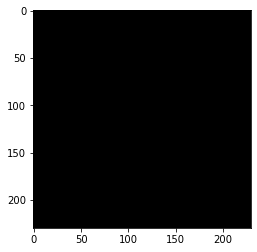

In [709]:
plt.imshow(image)
plt.show()